# HOUSING: PRICE PREDICTION

### Problem Statement

##### Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

##### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

##### The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

##### For this company wants to know:
##### Which variables are important to predict the price of variable?
##### How do these variables describe the price of the house?

##### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

## Some Useful Information About the Predictors provided to us to have the better understanding of the Predictors :

* MSSubClass: Identifies the type of dwelling involved in the sale.	
* MSZoning: Identifies the general zoning classification of the sale.
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access to property
* Alley: Type of alley access to property
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to various conditions
* Condition2: Proximity to various conditions (if more than one is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Evaluates the quality of the material on the exterior 
* ExterCond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Evaluates the height of the basement
* BsmtCond: Evaluates the general condition of the basement
* BsmtExposure: Refers to walkout or garden level walls
* BsmtFinType1: Rating of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Rating of basement finished area (if multiple types)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal : $Value of miscellaneous feature
* MoSold: Month Sold (MM)
* YrSold: Year Sold (YYYY)
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [1]:
# importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing test and training dataset

df_train = pd.read_csv(r"D:\Housing Dataset Fliprobo\Project-Housing_splitted\train.csv")
df_test = pd.read_csv(r"D:\Housing Dataset Fliprobo\Project-Housing_splitted\test.csv")
pd.set_option('display.max_columns',None)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [3]:
print("df_train : ",(df_train.shape))
print("df_test : ",(df_test.shape))

df_train :  (1168, 81)
df_test :  (292, 80)


In [4]:
# checking basis info of test and train dataset
train = df_train.info()
test = df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
# checking basis summary of dataset
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [6]:
#checking nan value for test and training dataset
pd.set_option('display.max_rows',None)
train = pd.isna(df_train).sum()
test = pd.isna(df_test).sum()
value= pd.concat([train,test],axis=1,keys=["Train","Test"])
value

Train   Test
Id                 0    0.0
MSSubClass         0    0.0
MSZoning           0    0.0
LotFrontage      214   45.0
LotArea            0    0.0
Street             0    0.0
Alley           1091  278.0
LotShape           0    0.0
LandContour        0    0.0
Utilities          0    0.0
LotConfig          0    0.0
LandSlope          0    0.0
Neighborhood       0    0.0
Condition1         0    0.0
Condition2         0    0.0
BldgType           0    0.0
HouseStyle         0    0.0
OverallQual        0    0.0
OverallCond        0    0.0
YearBuilt          0    0.0
YearRemodAdd       0    0.0
RoofStyle          0    0.0
RoofMatl           0    0.0
Exterior1st        0    0.0
Exterior2nd        0    0.0
MasVnrType         7    1.0
MasVnrArea         7    1.0
ExterQual          0    0.0
ExterCond          0    0.0
Foundation         0    0.0
BsmtQual          30    7.0
BsmtCond          30    7.0
BsmtExposure      31    7.0
BsmtFinType1      30    7.0
BsmtFinSF1         0    0.0
BsmtFinType2      31    7.0
BsmtFinSF2         0    0.0
BsmtUnfSF          0    0.0
TotalBsmtSF        0    0.0
Heating            0    0.0
HeatingQC          0    0.0
CentralAir         0    0.0
Electrical         0    1.0
1stFlrSF           0    0.0
2ndFlrSF           0    0.0
LowQualFinSF       0    0.0
GrLivArea          0    0.0
BsmtFullBath       0    0.0
BsmtHalfBath       0    0.0
FullBath           0    0.0
HalfBath           0    0.0
BedroomAbvGr       0    0.0
KitchenAbvGr       0    0.0
KitchenQual        0    0.0
TotRmsAbvGrd       0    0.0
Functional         0    0.0
Fireplaces         0    0.0
FireplaceQu      551  139.0
GarageType        64   17.0
GarageYrBlt       64   17.0
GarageFinish      64   17.0
GarageCars         0    0.0
GarageArea         0    0.0
GarageQual        64   17.0
GarageCond        64   17.0
PavedDrive         0    0.0
WoodDeckSF         0    0.0
OpenPorchSF        0    0.0
EnclosedPorch      0    0.0
3SsnPorch          0    0.0
ScreenPorch        0    0.0
PoolArea           0    0.0
PoolQC          1161  292.0
Fence            931  248.0
MiscFeature     1124  282.0
MiscVal            0    0.0
MoSold             0    0.0
YrSold             0    0.0
SaleType           0    0.0
SaleCondition      0    0.0
SalePrice          0    NaN

In [7]:
#checking unique in dataset for test and train
df_train.nunique().to_frame("unique value")
train = df_train.nunique()
test = df_test.nunique()
value= pd.concat([train,test],axis=1,keys=["Train","Test"])
value

Train   Test
Id              1168  292.0
MSSubClass        15   15.0
MSZoning           5    4.0
LotFrontage      106   65.0
LotArea          892  249.0
Street             2    2.0
Alley              2    2.0
LotShape           4    4.0
LandContour        4    4.0
Utilities          1    2.0
LotConfig          5    5.0
LandSlope          3    3.0
Neighborhood      25   24.0
Condition1         9    8.0
Condition2         8    2.0
BldgType           5    5.0
HouseStyle         8    8.0
OverallQual       10    8.0
OverallCond        9    7.0
YearBuilt        110   84.0
YearRemodAdd      61   57.0
RoofStyle          6    5.0
RoofMatl           8    3.0
Exterior1st       14   12.0
Exterior2nd       15   14.0
MasVnrType         4    4.0
MasVnrArea       283  104.0
ExterQual          4    4.0
ExterCond          5    4.0
Foundation         6    6.0
BsmtQual           4    4.0
BsmtCond           4    3.0
BsmtExposure       4    4.0
BsmtFinType1       6    6.0
BsmtFinSF1       551  184.0
BsmtFinType2       6    6.0
BsmtFinSF2       122   32.0
BsmtUnfSF        681  231.0
TotalBsmtSF      636  224.0
Heating            6    4.0
HeatingQC          5    4.0
CentralAir         2    2.0
Electrical         5    4.0
1stFlrSF         669  238.0
2ndFlrSF         351  113.0
LowQualFinSF      21    4.0
GrLivArea        746  246.0
BsmtFullBath       4    3.0
BsmtHalfBath       3    2.0
FullBath           4    4.0
HalfBath           3    3.0
BedroomAbvGr       8    7.0
KitchenAbvGr       4    3.0
KitchenQual        4    4.0
TotRmsAbvGrd      12   10.0
Functional         7    6.0
Fireplaces         4    3.0
FireplaceQu        5    5.0
GarageType         6    6.0
GarageYrBlt       97   71.0
GarageFinish       3    3.0
GarageCars         5    5.0
GarageArea       392  166.0
GarageQual         5    5.0
GarageCond         5    5.0
PavedDrive         3    3.0
WoodDeckSF       244   87.0
OpenPorchSF      176   92.0
EnclosedPorch    106   36.0
3SsnPorch         18    3.0
ScreenPorch       65   21.0
PoolArea           8    1.0
PoolQC             3    0.0
Fence              4    4.0
MiscFeature        4    2.0
MiscVal           20    8.0
MoSold            12   12.0
YrSold             5    5.0
SaleType           9    6.0
SaleCondition      6    4.0
SalePrice        581    NaN

# EDA

In [8]:
#droping columns
df_train.drop(["Fence","PoolQC","MiscFeature","Alley","Id"],axis=1,inplace=True)

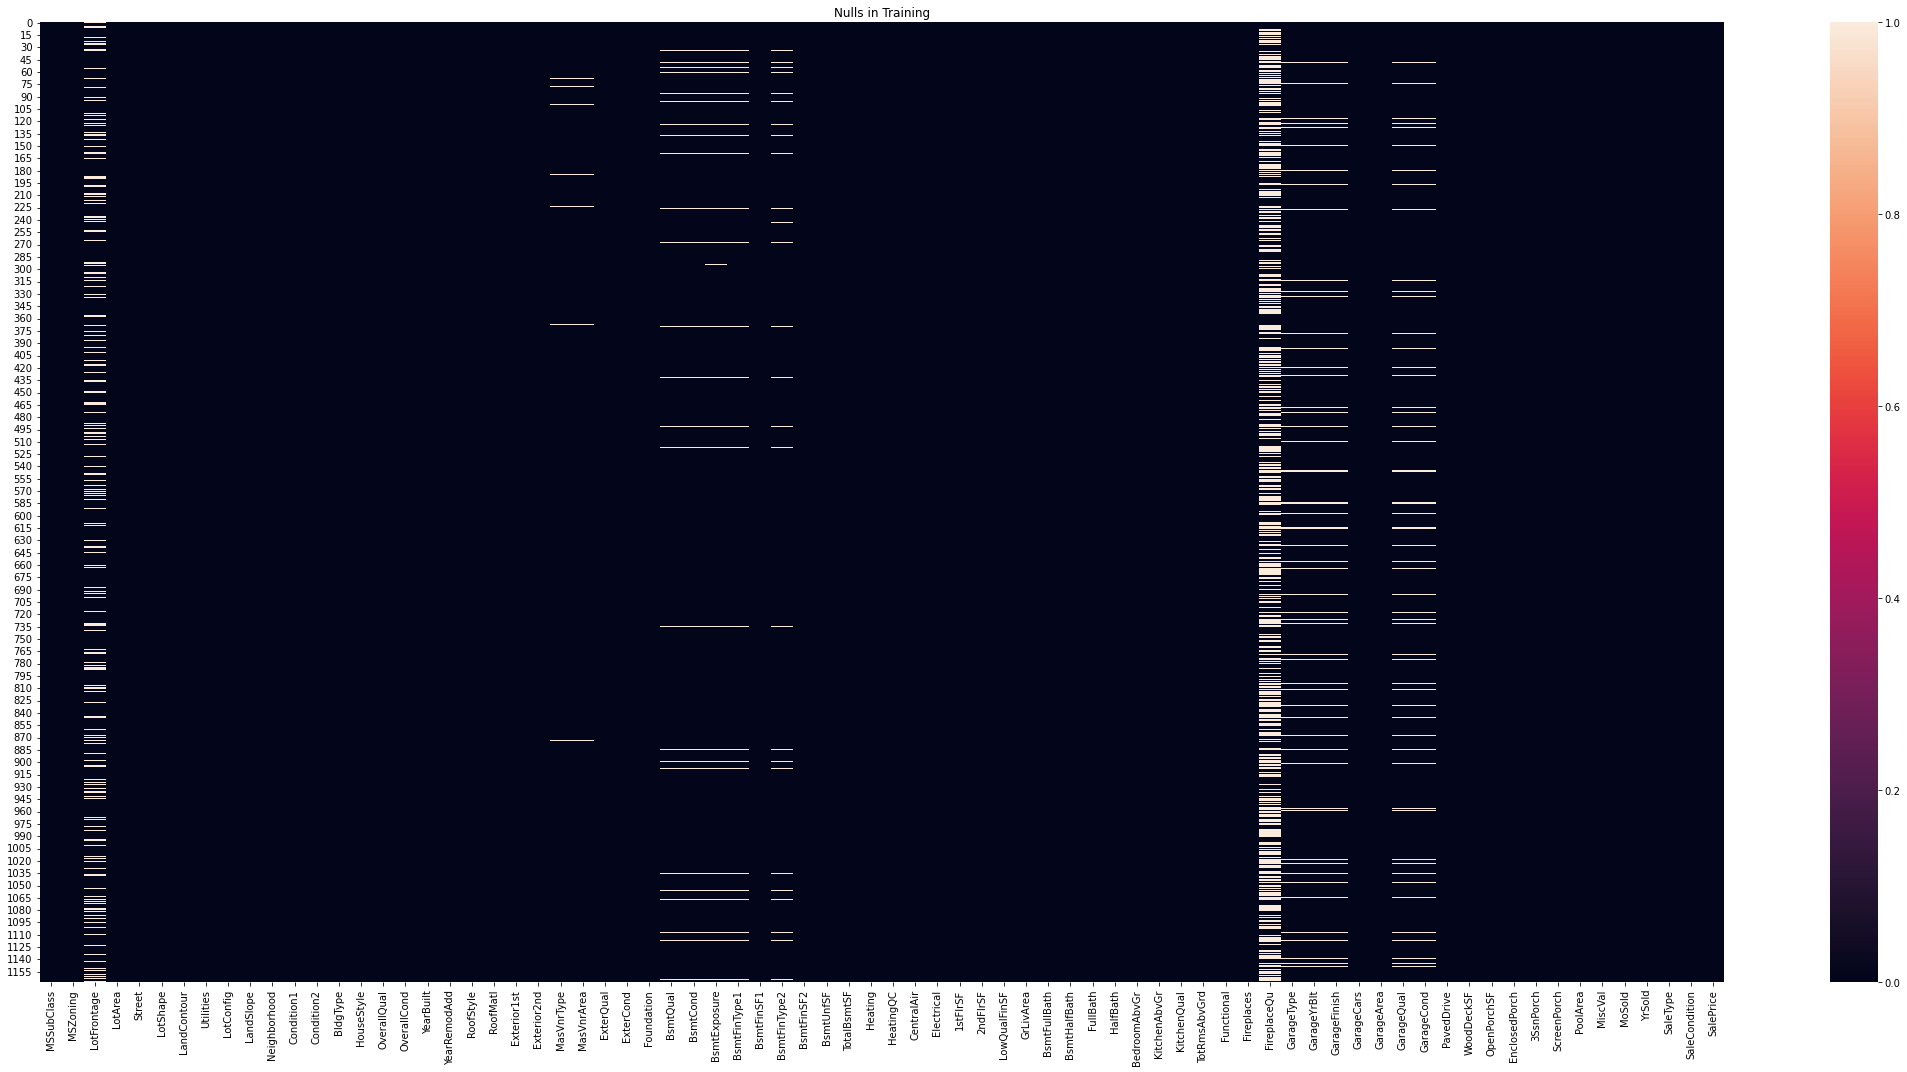

In [9]:
# Visualizing null values in train dataset
plt.figure(figsize=[30,15])
sns.heatmap(df_train.isnull())
plt.title("Nulls in Training")
plt.tight_layout()

Fence,MiscFeature,Alley,PoolQC all these column have more than 80 % missing value so dropping this column

In [10]:
# filling missing value with mode
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

In [11]:
# filling missing value with mean
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

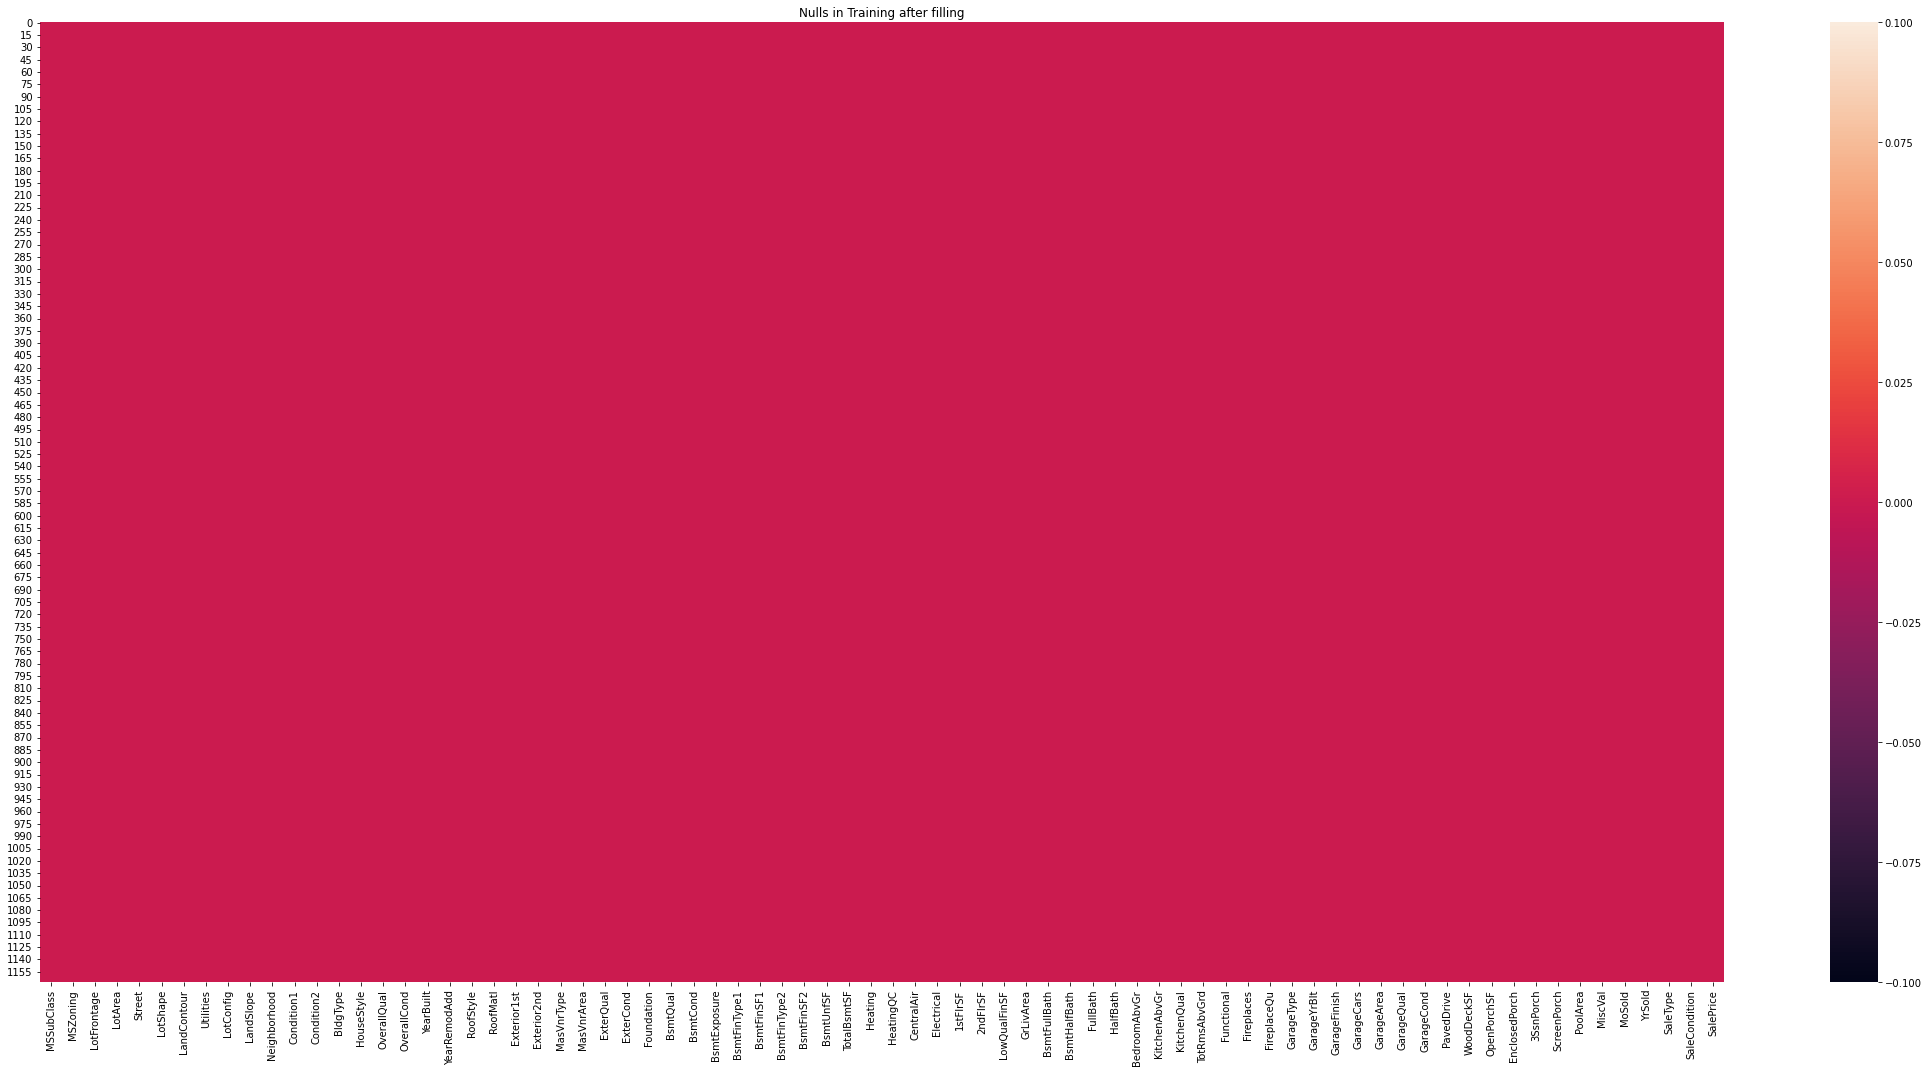

In [12]:
# Visualizing null values in train dataset after filling them
plt.figure(figsize=[30,15])
sns.heatmap(df_train.isnull())
plt.title("Nulls in Training after filling")
plt.tight_layout()

In [13]:
#Adding new features to train data
# Total number of bathrooms
df_train["TotalBath"] = df_train["BsmtFullBath"] + (0.5 * df_train["BsmtHalfBath"]) + df_train["FullBath"] + (0.5 * df_train["HalfBath"])


# Total SF for house (incl. basement)
df_train["AllSF"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]


# Total SF for 1st + 2nd floors
df_train["AllFlrsSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]


# Total SF for porch
df_train["AllPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] +df_train["3SsnPorch"] + df_train["ScreenPorch"]



* TotalBsmtSF is the addition of (BsmtFinSF1,BsmtFinSF2) and i am creating one column to avoid zeros which will make my data skewed

* creating one column for bathroom with half bathroom representing 0.5

* one column is for total floor area of first floor and second floor

* one column is for total porch as there are zeros to avoid filling with zeros i have made one column

In [14]:
# dropping  unwanted column as these column has been merged above to form new column 
df_train.drop(columns=["OpenPorchSF","EnclosedPorch","Utilities","3SsnPorch","ScreenPorch","1stFlrSF","2ndFlrSF","GrLivArea","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BsmtFinSF1","BsmtFinSF2"],axis=1,inplace=True)

In [15]:
#checking shape after feature engineering
df_train.shape

(1168, 65)

In [16]:
# Creating a list of categorical and numerical datatypes in train dataset
numerical=[]
categorical=[]
for y in df_train.columns:
    if (df_train[y].dtype=='object'):
          categorical.append(y)
    else:
        numerical.append(y)

In [17]:
len(numerical)

27

In [18]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalBath',
 'AllSF',
 'AllFlrsSF',
 'AllPorchSF']

In [19]:
len(categorical)

38

In [20]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# univariate analysis

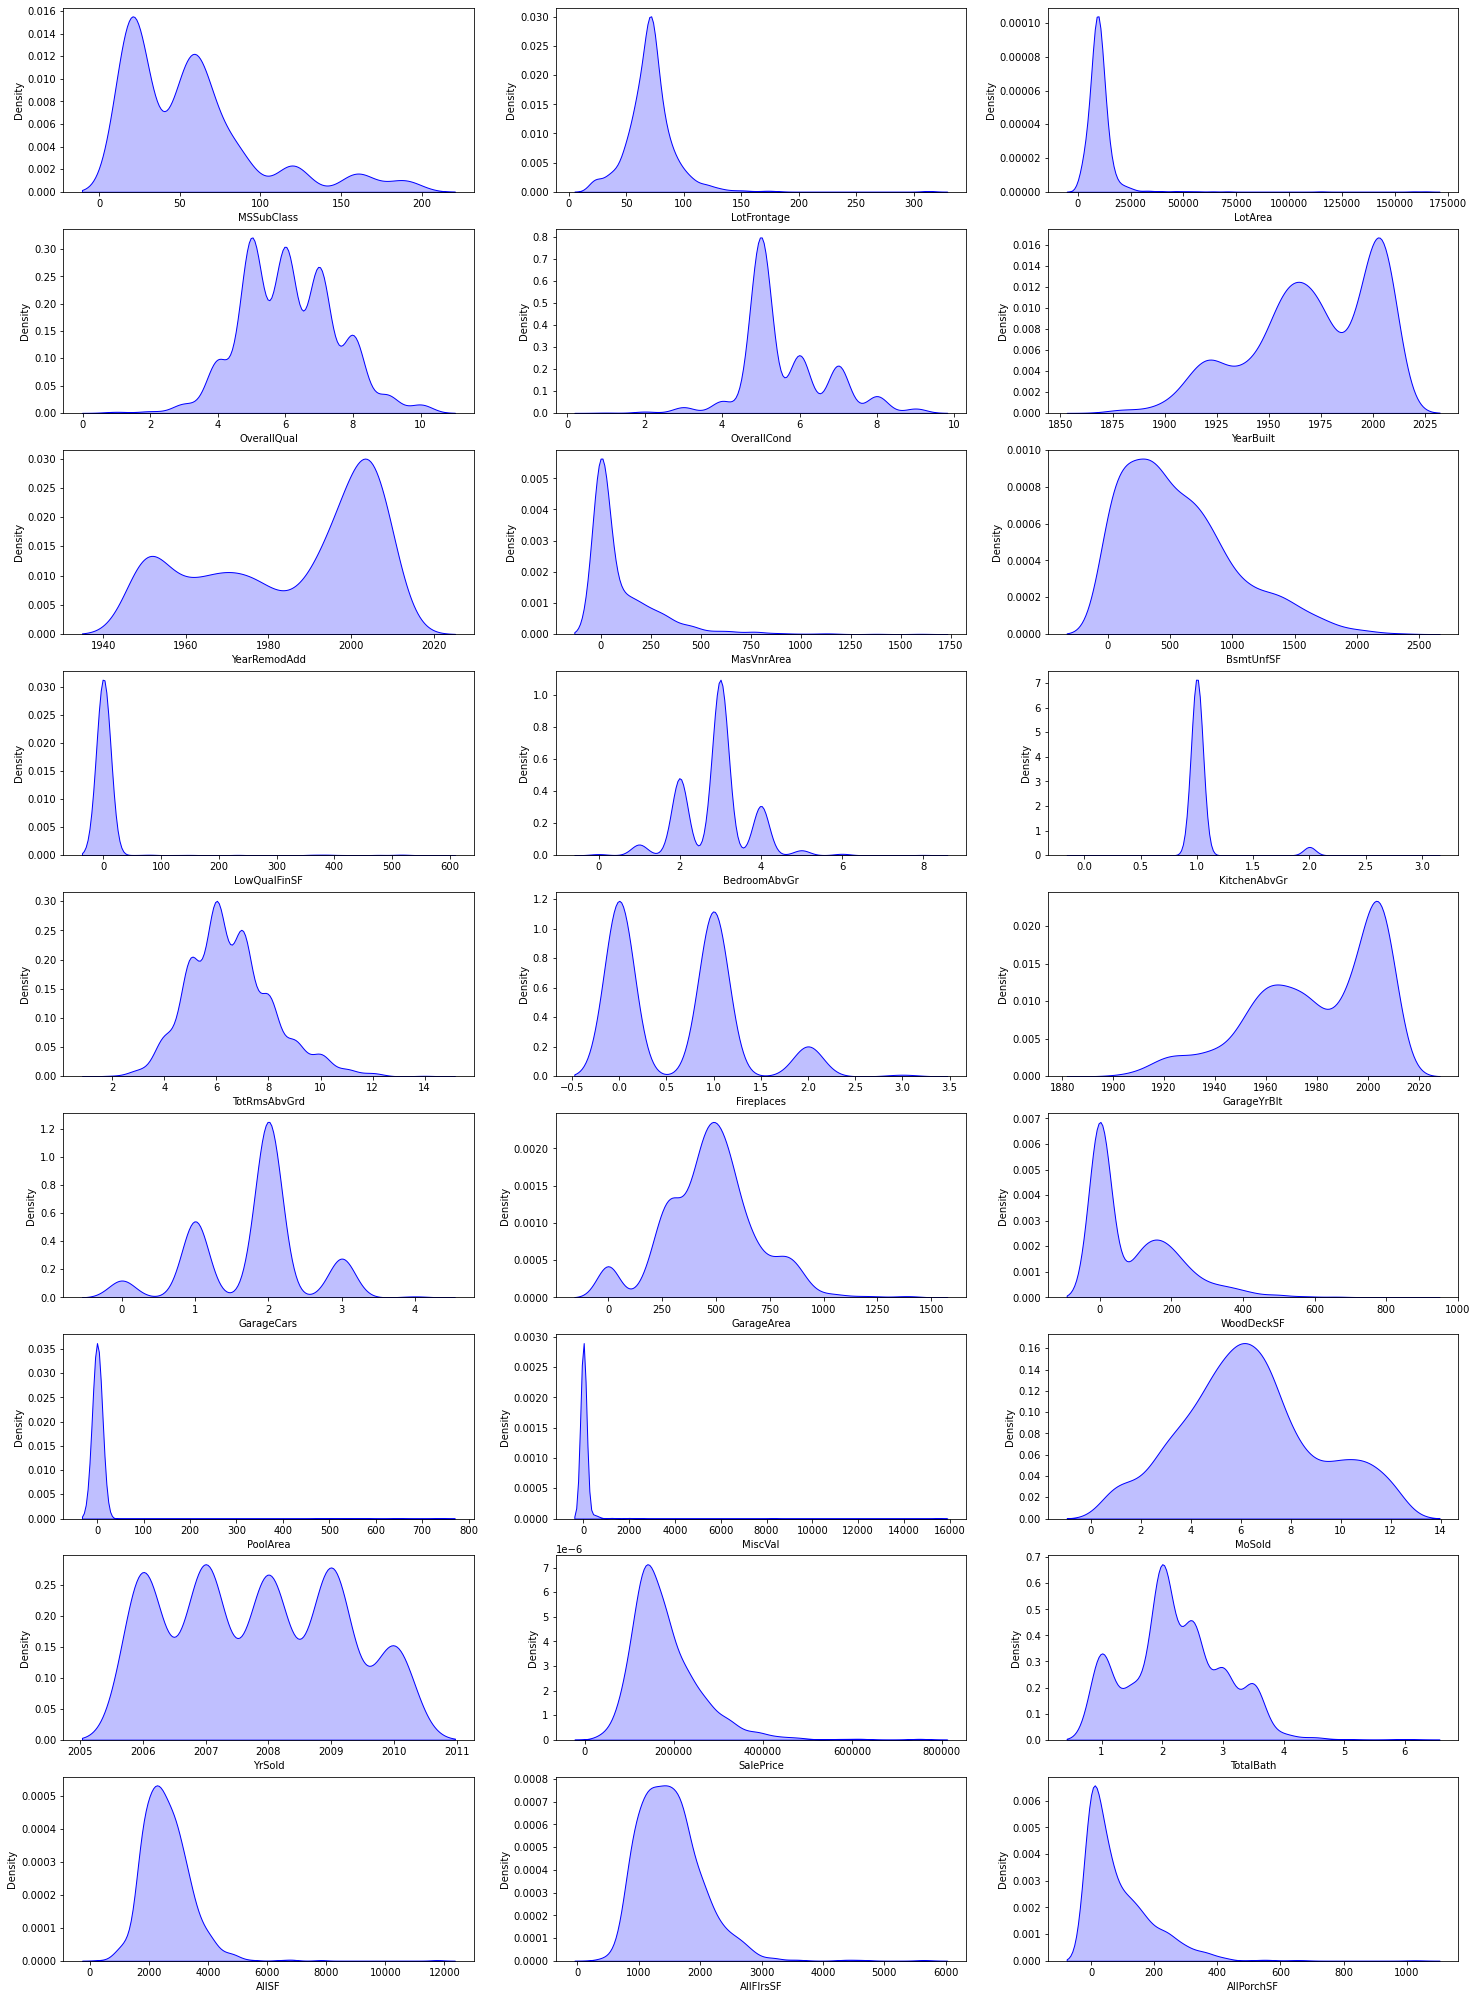

In [21]:
plotnumber = 1
plt.figure(figsize=(25,40))
for i in df_train[numerical]:
    if plotnumber < 30:
        ax = plt.subplot(10,3,plotnumber)
        sns.kdeplot(df_train[i],data=df_train,color='b',fill=True)
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

In [22]:
# Plotting the categorical :

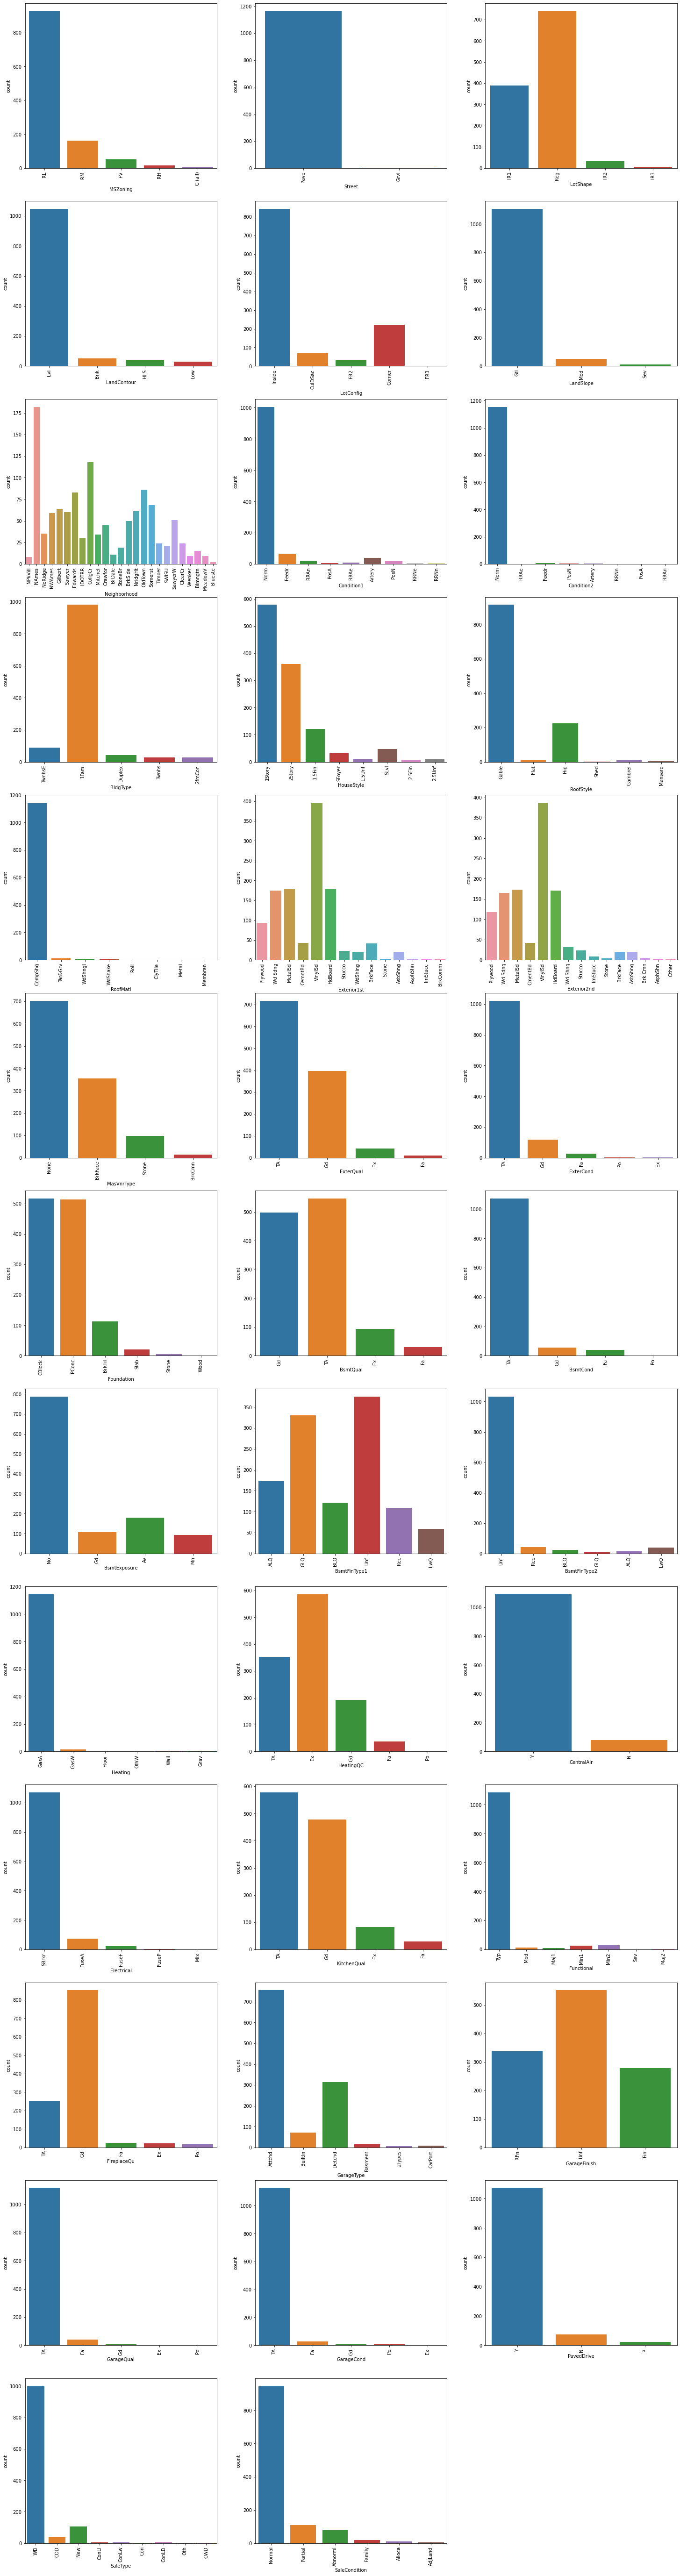

In [23]:
plotnumber = 1
plt.figure(figsize=(25,100))
for i in df_train[categorical]:
    if plotnumber < 39:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df_train[i],data=df_train)
        plt.xlabel(i,fontsize=10)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.show()

# OBSERVATIONS :


##### MSZoning: The houses having Residential Low Density zoning of the sale have high count and commercial zoning sale have very less count compared to others.

##### Street: The count of road access to the property Paved is more than 90 % of the property where Graved type is very less.

##### LotShape: The count is high for the property having the shape regular followed by slightly regular and the count is less for irregular shape of property.

##### LandContour: The total number of flatness of the property for level is high which has 89.55 % and the others like banked, hillside and depression have very less flatness of area.

##### LotConfig: Inside lot configiration has high count and Frontage on 3 sides of property have very less count compared to others.

##### LandSlope: The slope of the property Gentle slope has very high count  and other types Moderate Slope and Severe Slope have very less count.

##### Neighborhood: The count is high for the North Ames cities floowed by college creek and count is very low for Bluestem.

##### Condition1: The count is high for the Normal proximity condition apart from this all the others have very less count.

##### Condition2: Similar to condition1, in comdition2 also Normal proximity has very high count compared to others.

##### BldgType: Single-family detached dwelling type has very high counts compared to other types have very less count.

##### HouseStyle: 1 story style of dwelling has high count followed by 2 story and others have very less count.

##### RoofStyle: The flat type roof has high count and shed has very less count.

##### RoofMatl: The roof material type Standard (Composite) Shingle has highest count and others have very less counts.

##### Exterior1st: Most of the houses have Vinyl Siding exterior covering materials followed by hard board also Brick Common, Asphalt Shingles and Imitation Stucco have very count which means there are no more houses with these types.

##### Exterior2nd: Similar to Exterior1st, here also most of the houses have Vinyl Siding exterior covering materials.

##### MasVnrType: Around 60 % of the houses does not have Masonry veneer type, 30 % of the houses contains Brick Face type of Masonry veneer.
##### ExterQual: Around 60 % of the houses evaluates typical/average quality of the material on the exterior, around 30 % of the houses have good quality of the material on the exterior. Only few have excellent quality.
.
##### ExterCond: The present condition of the material on the exterior for most of the houses are Average/Typical.

##### Foundation: Most of the houses have Cinder Block and Poured Contrete type of foundation.

##### BsmtQual: Most of the houses evaluates typical/average and good quality of heoght of the basement, only few of the houses have excellent quality.

##### BsmtCond: Around 90% of the houses have typical/average condition of the basement and only few houses have poor condion.

##### BsmtExposure: Around 60 % of the houses does not contain any walkout or garden level walls and 5 % of the houses have minimum exposure
##### BsmtFinType1: The count is high for the houses having unfinished basement area. Also some houses have Good Living Quarters.

##### BsmtFinType2: Similar to BsmtFinType1, here also the count is high for unfinished basements.

##### Heating: Most of the houses have Gas forced warm air furnace heating type.

##### HeatingQC: Most of the houses have excellent heating quality and condition also some houses have typical/average HeatingQC and only very few of the houses have poor heating quality and condition.

##### CentralAir: Most of the houses have central air conditioning and only few of houses do not have air conditioning.

##### Electrical: The electrical system of the type Standard Circuit Breakers & Romex has very high count which means most of the houses have this facility.

##### KitchenQual: Around half of the houses contains typical/average kitchen quality and around 40 % of the houses have good kutchen quality. The count for excellent kitchen quality is very low .

##### Functional: The total number of home functionality of the property for typical functionality have high count compared to others.

##### FireplaceQuv: The houses with Masonry Fireplace in main level have good quality compared ot others.

##### GarageType: The garage location attached to home has high count also the garage locations detached to home have moderate level of counts. Only few houses have car port and more than one type of garage

##### GarageFinish: Almost half Of the houses have unfinished garage interior, Around 1/3rd rough finished and around 20% of the houses' interior garage has finished.

##### GarageQual: Houses with typical/average garage quality have high count compared to others.

##### GarageCond: Houses with typical/average garage condition have high count compared to others

##### PavedDrive: Around 90% of the houses contains the paved drive way. 

##### SaleType: Warranty Deed type of sale has high count followed by Home just constructed and sold(new).

##### SaleCondition: Normal sale has high count also the home which was not completed when last assessed also has average sale condition.


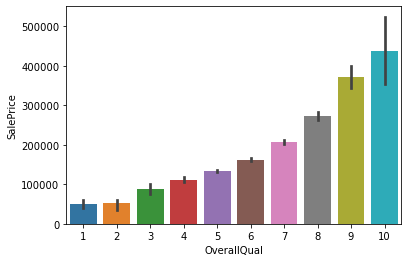

In [24]:
sns.barplot(y=df_train["SalePrice"],x=df_train["OverallQual"])
plt.xticks(rotation=0)
plt.show()

as the overall quality increases price of house also increases

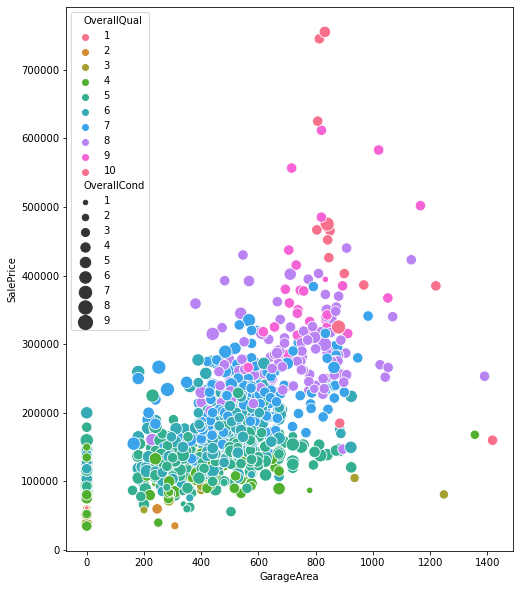

In [25]:
plt.figure(figsize=(8,10))
sns.scatterplot(df_train["GarageArea"],df_train["SalePrice"],hue=df_train["OverallQual"],legend="full",sizes=(20,200),size=df_train["OverallCond"],palette="husl")
plt.show()

with increase in garage area price increase & mostly the price ranges btw(100000-400000)

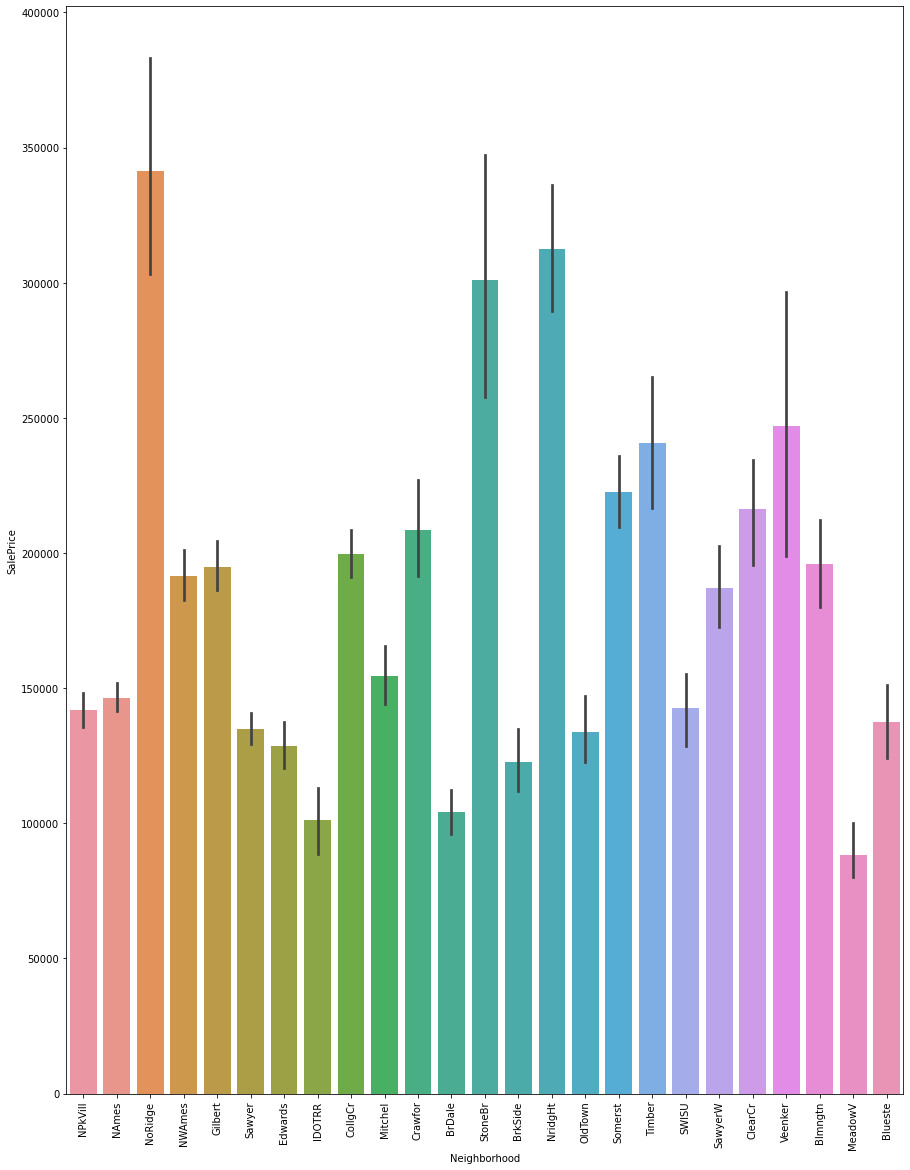

In [26]:
plt.figure(figsize=(15,20))
sns.barplot(df_train["Neighborhood"],df_train["SalePrice"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='LotFrontage'>

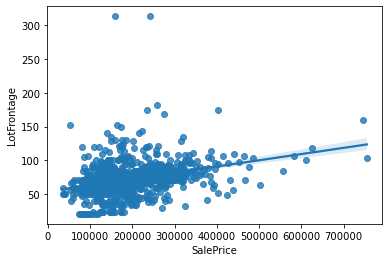

In [27]:
sns.regplot(y=df_train["LotFrontage"],x=df_train["SalePrice"])

generally people prefer (50-100) lot frontage 

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

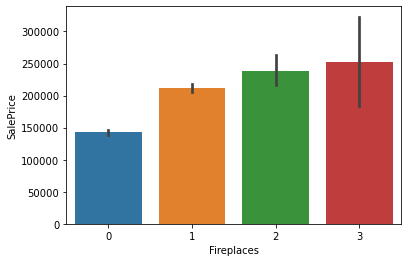

In [28]:
sns.barplot(df_train["Fireplaces"],df_train["SalePrice"])

as australia is a cold continent so people prefer fire place in there house.

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

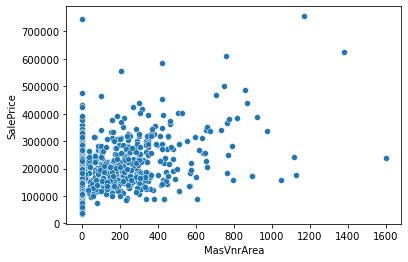

In [29]:
sns.scatterplot(df_train["MasVnrArea"],df_train["SalePrice"])

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

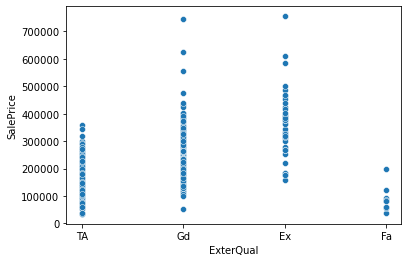

In [30]:
sns.scatterplot(df_train["ExterQual"],df_train["SalePrice"])

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

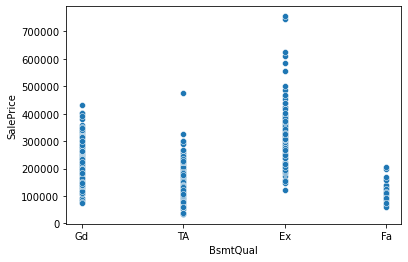

In [31]:
sns.scatterplot(df_train["BsmtQual"],df_train["SalePrice"])

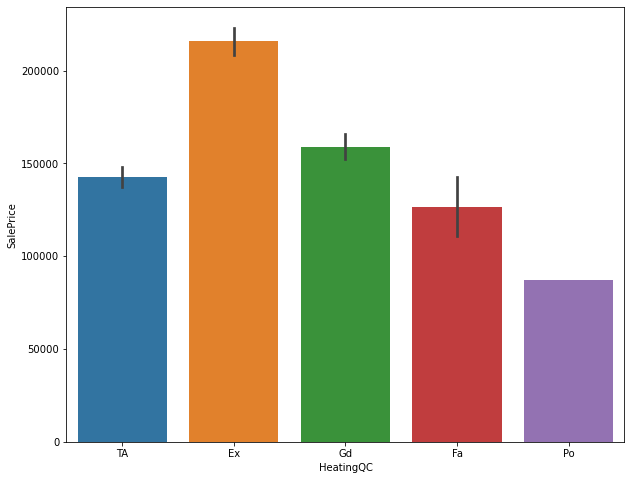

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(df_train["HeatingQC"],df_train["SalePrice"])
plt.show()

excellent heating quality have high prices as compare to other.

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

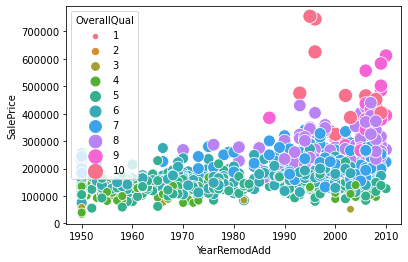

In [33]:
sns.scatterplot(x=df_train["YearRemodAdd"],y=df_train["SalePrice"],hue=df_train["OverallQual"],legend="full",sizes=(20,200),size=df_train["OverallQual"],palette="husl")

prices increase with quality and Remodel date

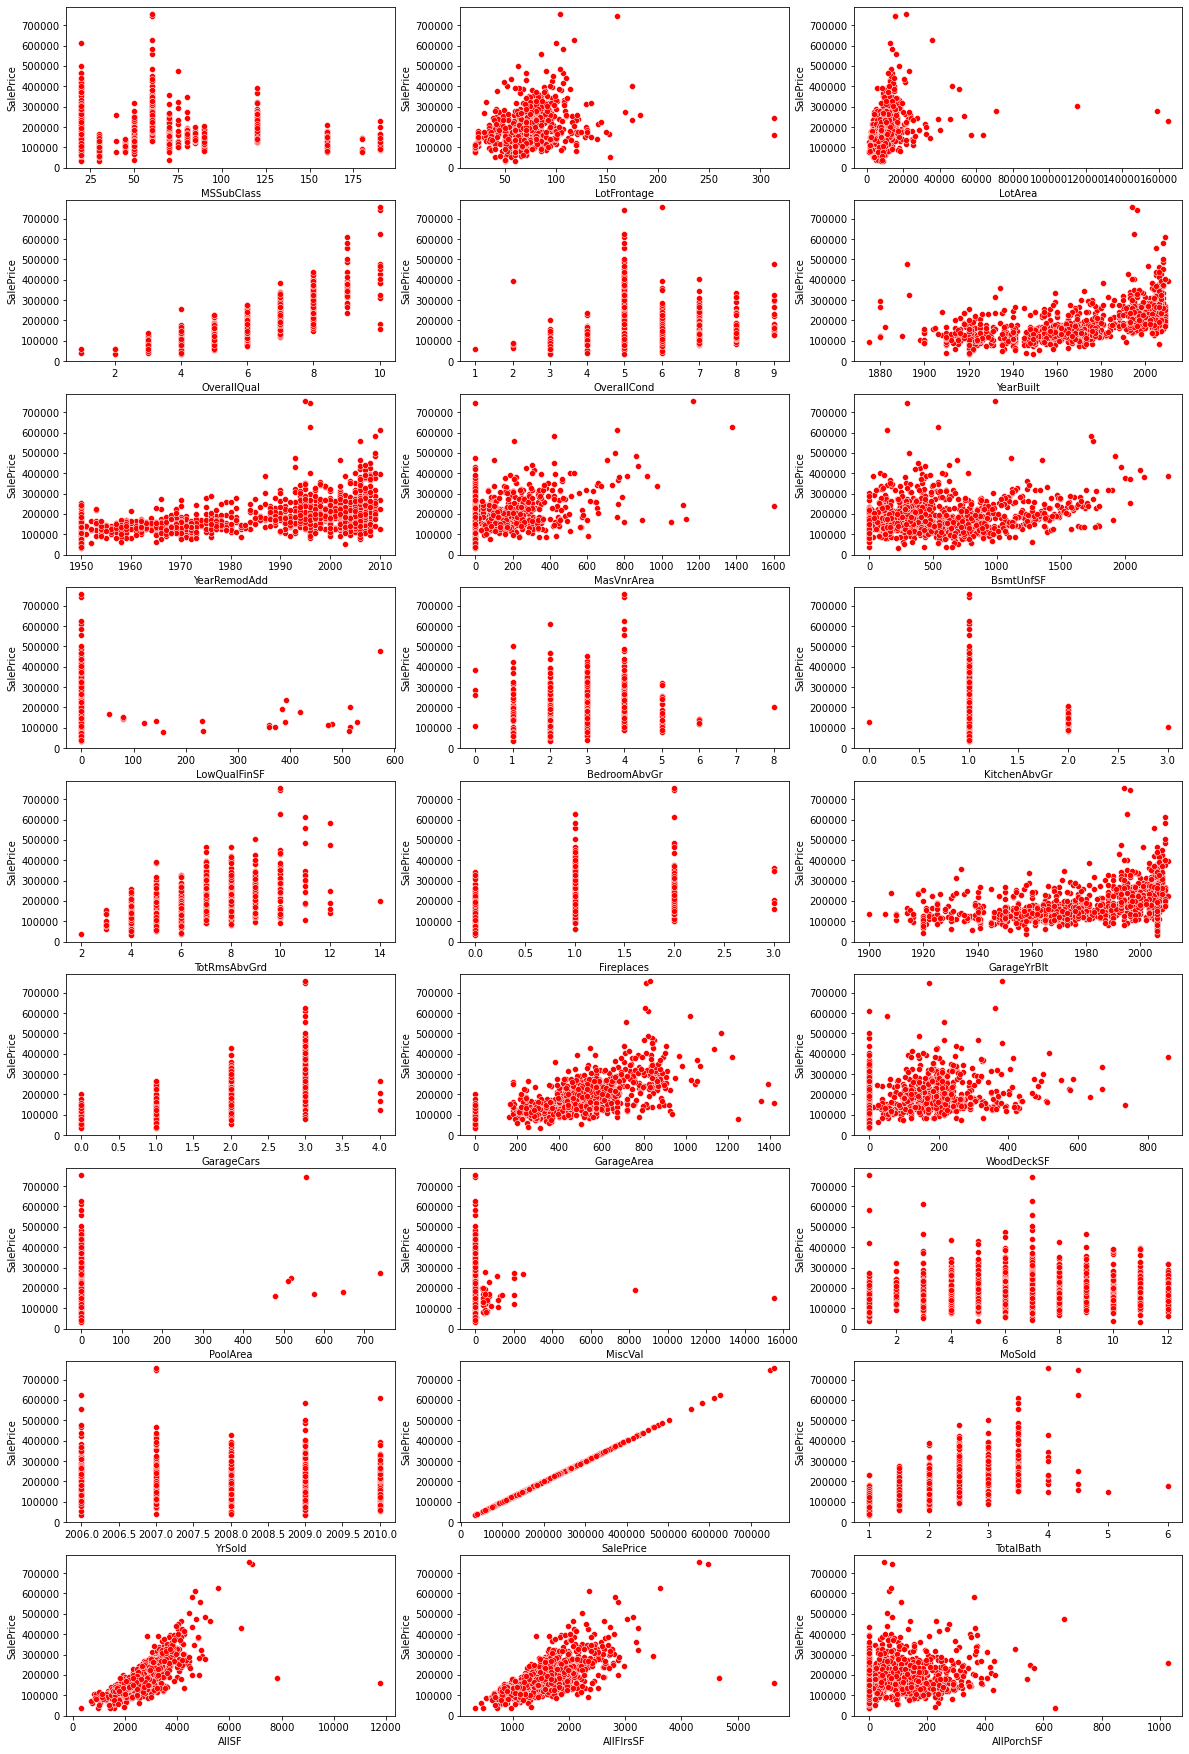

In [34]:
#bivariate analysis
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1
for column in df_train[numerical]:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.scatterplot(y=df_train["SalePrice"],x=df_train[column],color="red")
    plotnumber+=1
plt.show()

allsf, allflrssf,allporchsf is showing linear relationship with target column, it means as the value in all these column increase its saleprice also increease
people generally prefer one kitchen above ground floor so that is why prices are high for 1 kitchen above ground
overall quality is also showing linear relationship with target column
poolarea, misval is mostly having zeros in that it means that mostly housing are not having pool area.
there is some outliers in lot area.
utilities have only one value.


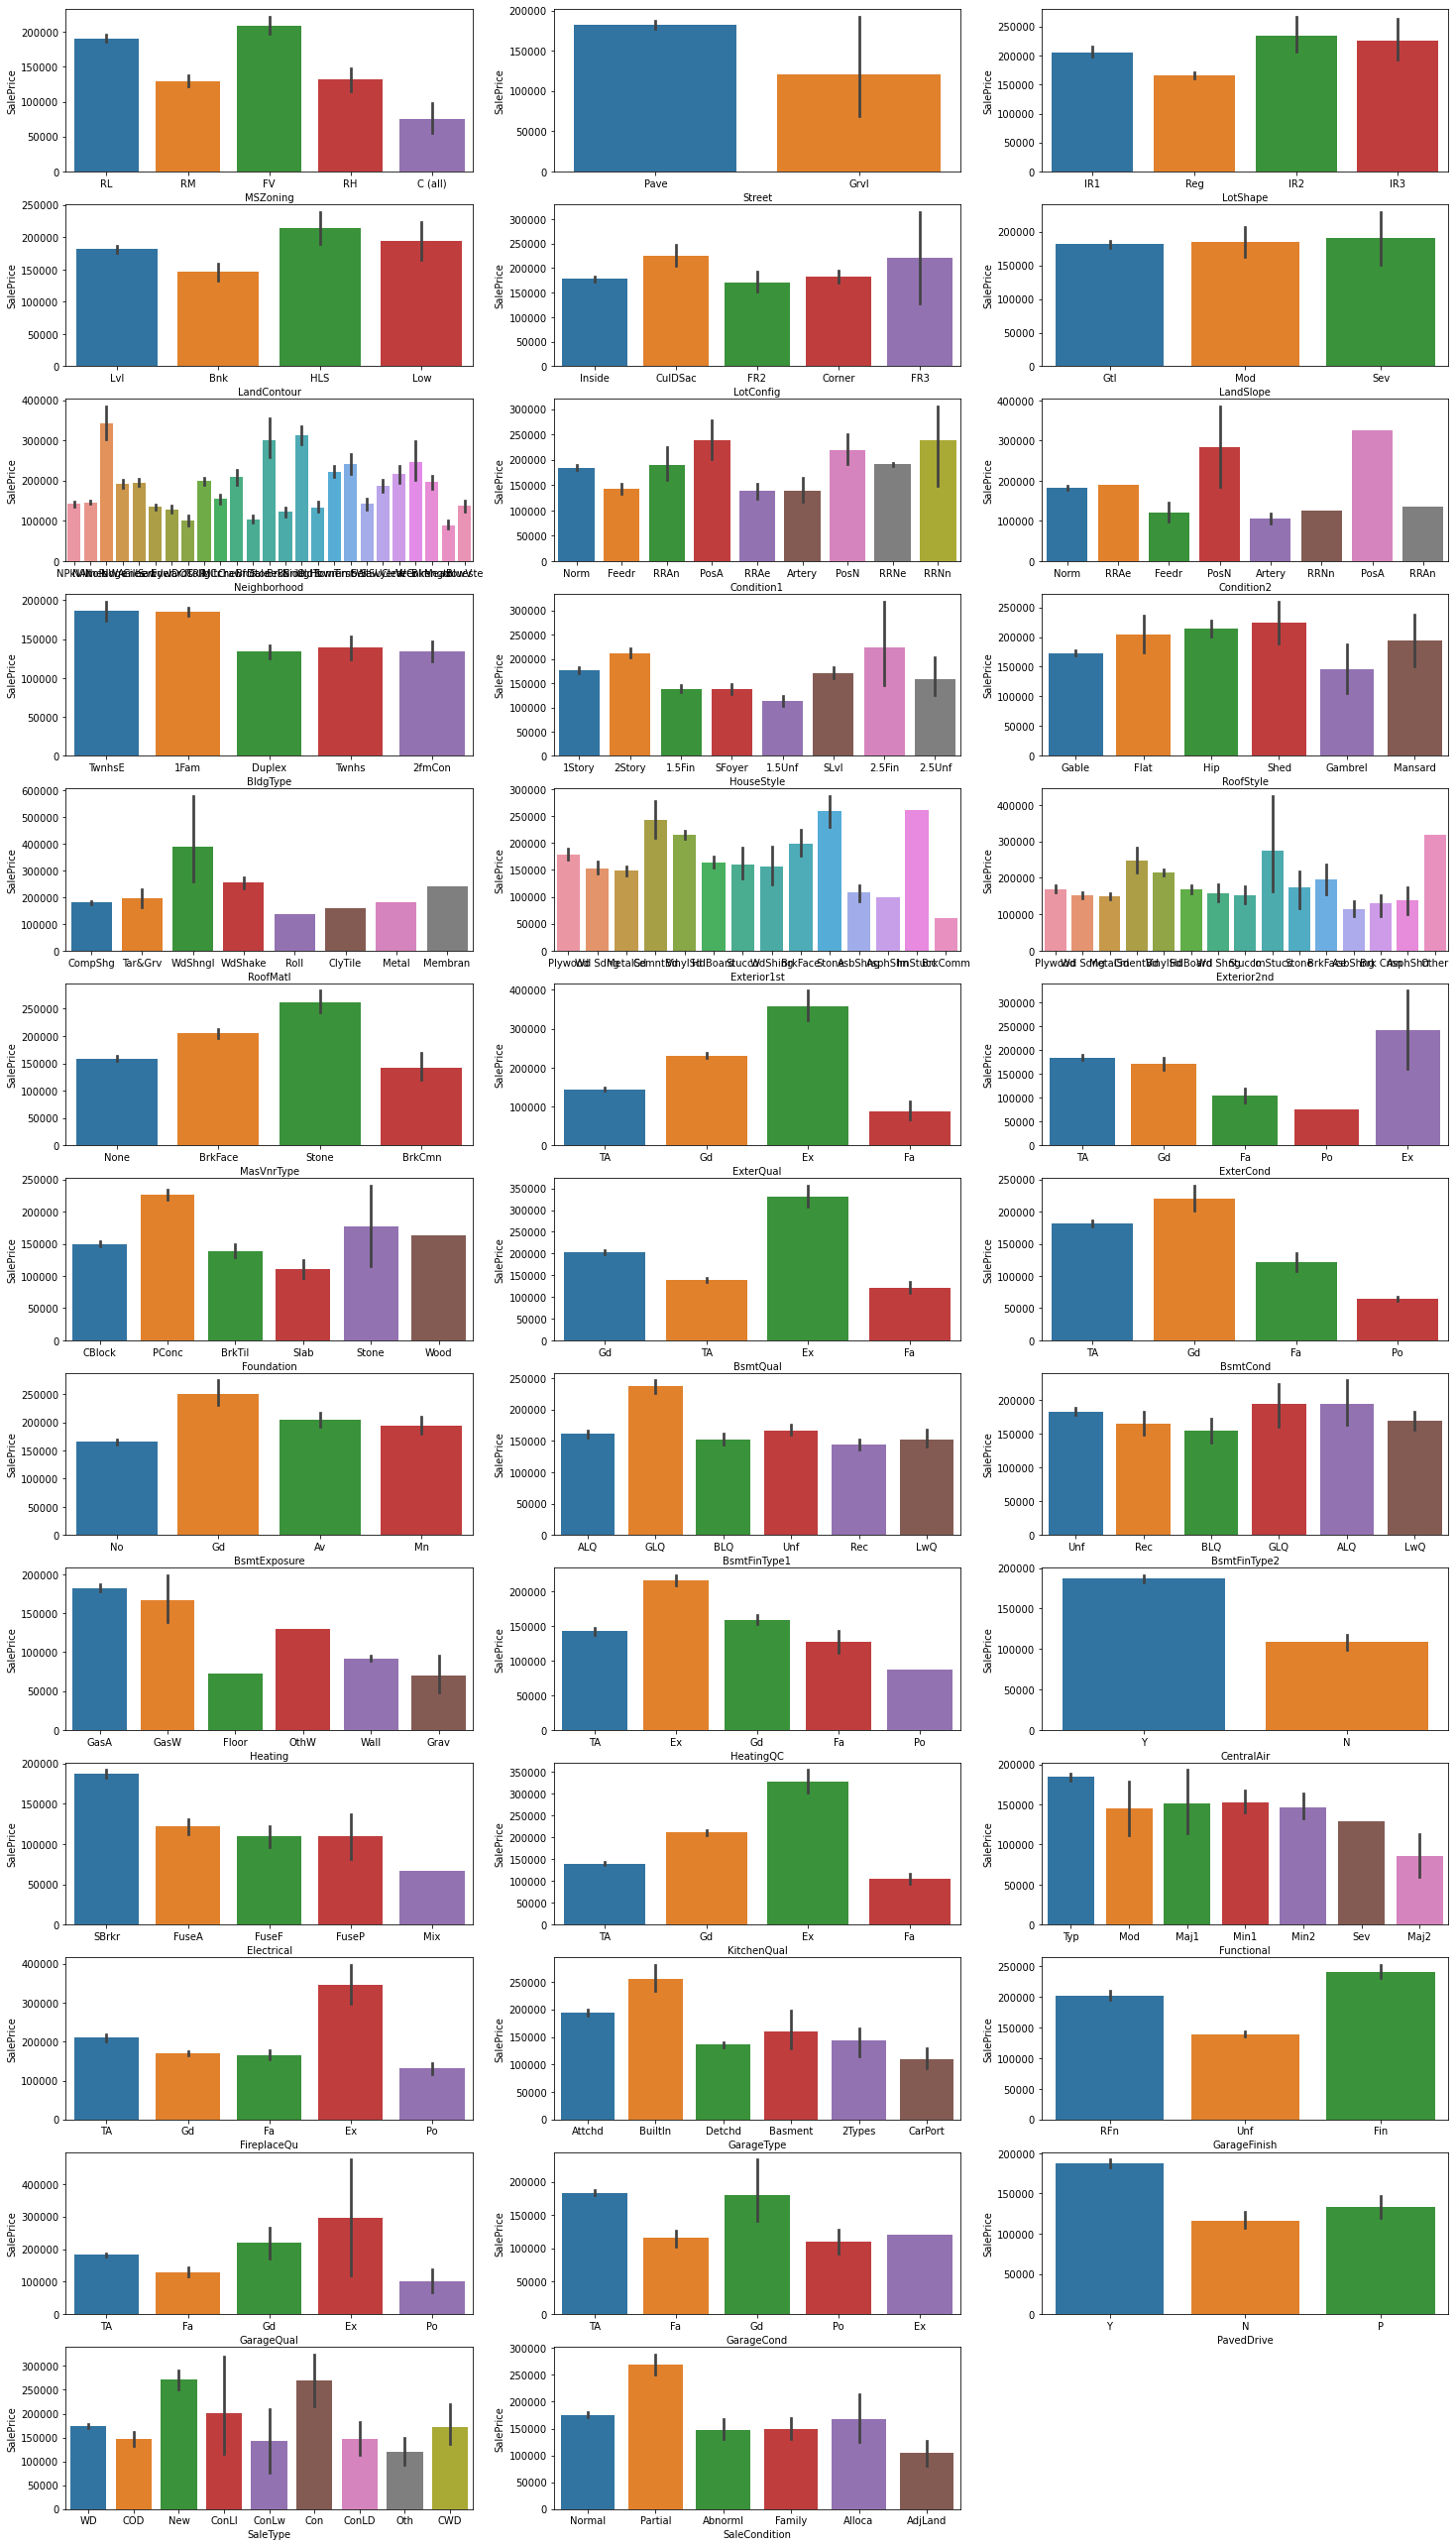

In [35]:
#bivariate analysis
plt.figure(figsize=(25,50),facecolor='white')
plotnumber = 1
for column in df_train[categorical]:
    if plotnumber<=40:
        ax=plt.subplot(14,3,plotnumber)
        sns.barplot(y=df_train["SalePrice"],x=df_train[column])
    plotnumber+=1
plt.show()

# OBSERVATIONS :

##### SalePrice vs MSZoning: Most of the houses are belongs to Floating Village Residential followed by Residential Low Density. The houses from this zone are have high saleprice compared to other zones.
##### SalePrice vs Street: By observing the bar plot, it is obvious that the property of house with Paved type of road have high SalePrice and the the houses in gravel roads have very less sale price.
##### SalePrice vs LotShape: Most of the houses having moderately irregular and irregular shape of property have high sale price and houses with regullar type of property have less sale peice compared to others.
##### SalePrice vs LandContour: The houses having the hillside and depression property flatness have high sale price compared to others.
##### SalePrice vs LotConfig: Most of the houses with Frontage on 3 sides of property have high sale price compared to others.
##### SalePrice vs LandSlope: There is no significance difference between the slope of the property. As we can observe the houses having Gentle slope, Moderate Slope and Severe Slope have same sale price.
##### SalePrice vs Neighborhood: The houses which are located near Northridge have high sale price compared to others.
##### SalePrice vs Condition1: The houses having the conditions adjacent to postive off-site feature and houses within 200' of North-South Railroad have high sale price compared to others.
##### SalePrice vs Condition2: The houses having the conditions near positive off-site feature park, greenbelt, etc and adjacent to postive off-site feature have high sale price.
##### SalePrice vs BldgType: Most of the houses are Single-family Detached and Townhouse End Unit and they have higher sale price compared to other categories.
##### SalePrice vs HouseStyle: Houses which are having style of dwelling 2nd level finished and Two story have high sale price compared to other types.
##### SalePrice vs RoofStyle: The houses having the roof style Flat, Hip and Shed have high sale price and the houses having gambrel roof style have less sale price.
##### SalePrice vs RoofMatl: Houses with Wood Shingles root materials have high sale prices.
##### SalePrice vs Exterior1st: Houses having Imitation Stucco, Stone and Cement Board as 1st exterior cover have high sale price.
##### SalePrice vs Exterior2nd: Houses having Imitation Stucco and other as 2nd cover have high sale price.
##### SalePrice vs MasVnrType: Houses having Stone Masonry veneer type have high sale price than other types.
##### SalePrice vs Foundation: Houses having Poured Contrete as foundation type have high sale price compared to other types.
##### SalePrice vs BsmtExposure: Houses having good walkout or garden level walls have high sale price compared to others.
###### SalePrice vs BsmtFinType1: The sale price is high for the houses containing good living quarters basement finished area.
##### SalePrice vs BsmtFinType2: The sale price is moderately high for the houses having good living quarters and average living quarters.
##### SalePrice vs Heating: The houses having the heating type gas forced warm air furnace and gas hot water or steam heat have high sale price.
##### SalePrice vs CentralAir: Most of the houses have central air conditioning so it is obvious that these houses have high sale price.
##### SalePrice vs Electrical: Most of the houses having standard circuit breakers & romex have high sale price compared to others.
##### SalePrice vs Functional: The houses having the typical functionality have maximum sales price and others have average sale price.
##### SalePrice vs FireplaceQu: The houses having excellent exceptional masonry fireplace quality have high sale price and the houses having poor fireplace quality have very less sale price compared to others.
##### SalePrice vs GarageType: The houses having built-in garage have high sale price compared to others.
##### SalePrice vs GarageFinishv: Garages located inside the house which is got finished have high sale price.
##### SalePrice vs PavedDrive: Houses having paved drive ways have high sale price.
##### SalePrice vs SaleType: Many houses having sale types as just constructed and sold and Contract 15 % Down payment regular terms have high sale price.
##### SalePrice vs SaleCondition: Houses having partial sale condition that is home was not completed when last assessed have high sale price.
##### SalePrice vs ExterQual: Houses having excellent quality of the material on the exterior have high sale price and houses having fair quality have very less sale price.
##### SalePrice vs ExterCond: Houses having excellent condition of the material on the exterior have high sale price and the houses having poor condition of the material on the exterior have very less sale price compared to others.
##### SalePrice vs BsmtQual: The houses which evaluates the excellent quality of height of the basement have high sale price compared to others.
##### SalePrice vs BsmtCond: The houses which evaluates the good quality of general condition of the basement have high sale price compared to others.
##### SalePrice vs OverallQual: The houses which have very excellent overall quality like material and finish of the house have high sale price. Also we can observe from the plot as the overall quality of the house increases, the sale price also increases. That is there is good linear relation between SalePrice and OverallQual.
##### SalePrice vs OverallCond: The houses having overall condition as excellent and average have very high sale price compared to others.
##### SalePrice vs HeatingQC: Most of the houses having excellent heating quality and condition have high sale price.
##### SalePrice vs KitchenQual: Houses having excellent quality of the kitchen have high sale price compared to others.
##### SalePrice vs GarageQual: The sale price of the house is high for the houses having excellent garage quality.
##### SalePrice vs GarageCond: Houses having typical/average garage condition have high sale price and the houses having good garage condition also have high sales price compared to others

In [36]:
# using label encoder for categorical column
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in df_train[categorical]:
    df_train[i] = lab_enc.fit_transform(df_train[i])

In [37]:
# checking correlation of all features with label
pd.set_option('display.max_rows',None)
correlations = df_train.corr()
correlations = correlations["SalePrice"].sort_values(ascending=False)
correlations

SalePrice        1.000000
OverallQual      0.789185
AllSF            0.766561
AllFlrsSF        0.714586
GarageCars       0.628329
TotalBath        0.624176
GarageArea       0.619000
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.381997
Foundation       0.374169
LotFrontage      0.323779
WoodDeckSF       0.315444
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
AllPorchSF       0.212832
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea         0.103280
Exterior2nd      0.097541
FireplaceQu      0.082705
GarageQual       0.080795
MoSold           0.072764
BsmtCond    

as we can see the new column is showing good correlation with target column

In [38]:
df_corr=df_train.corr()

In [39]:
# selecting top 17 feature 
cols = df_corr.nlargest(17, 'SalePrice').index

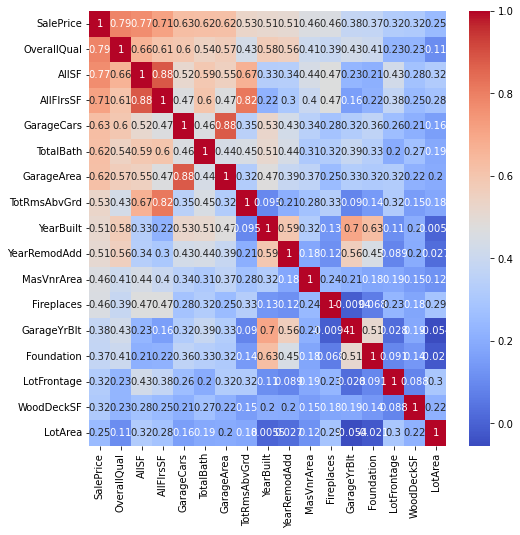

In [40]:
col=df_train[cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(col,cmap='coolwarm',annot=True)
plt.show()

these are the feature which have 40% or  more correlation with target variable.

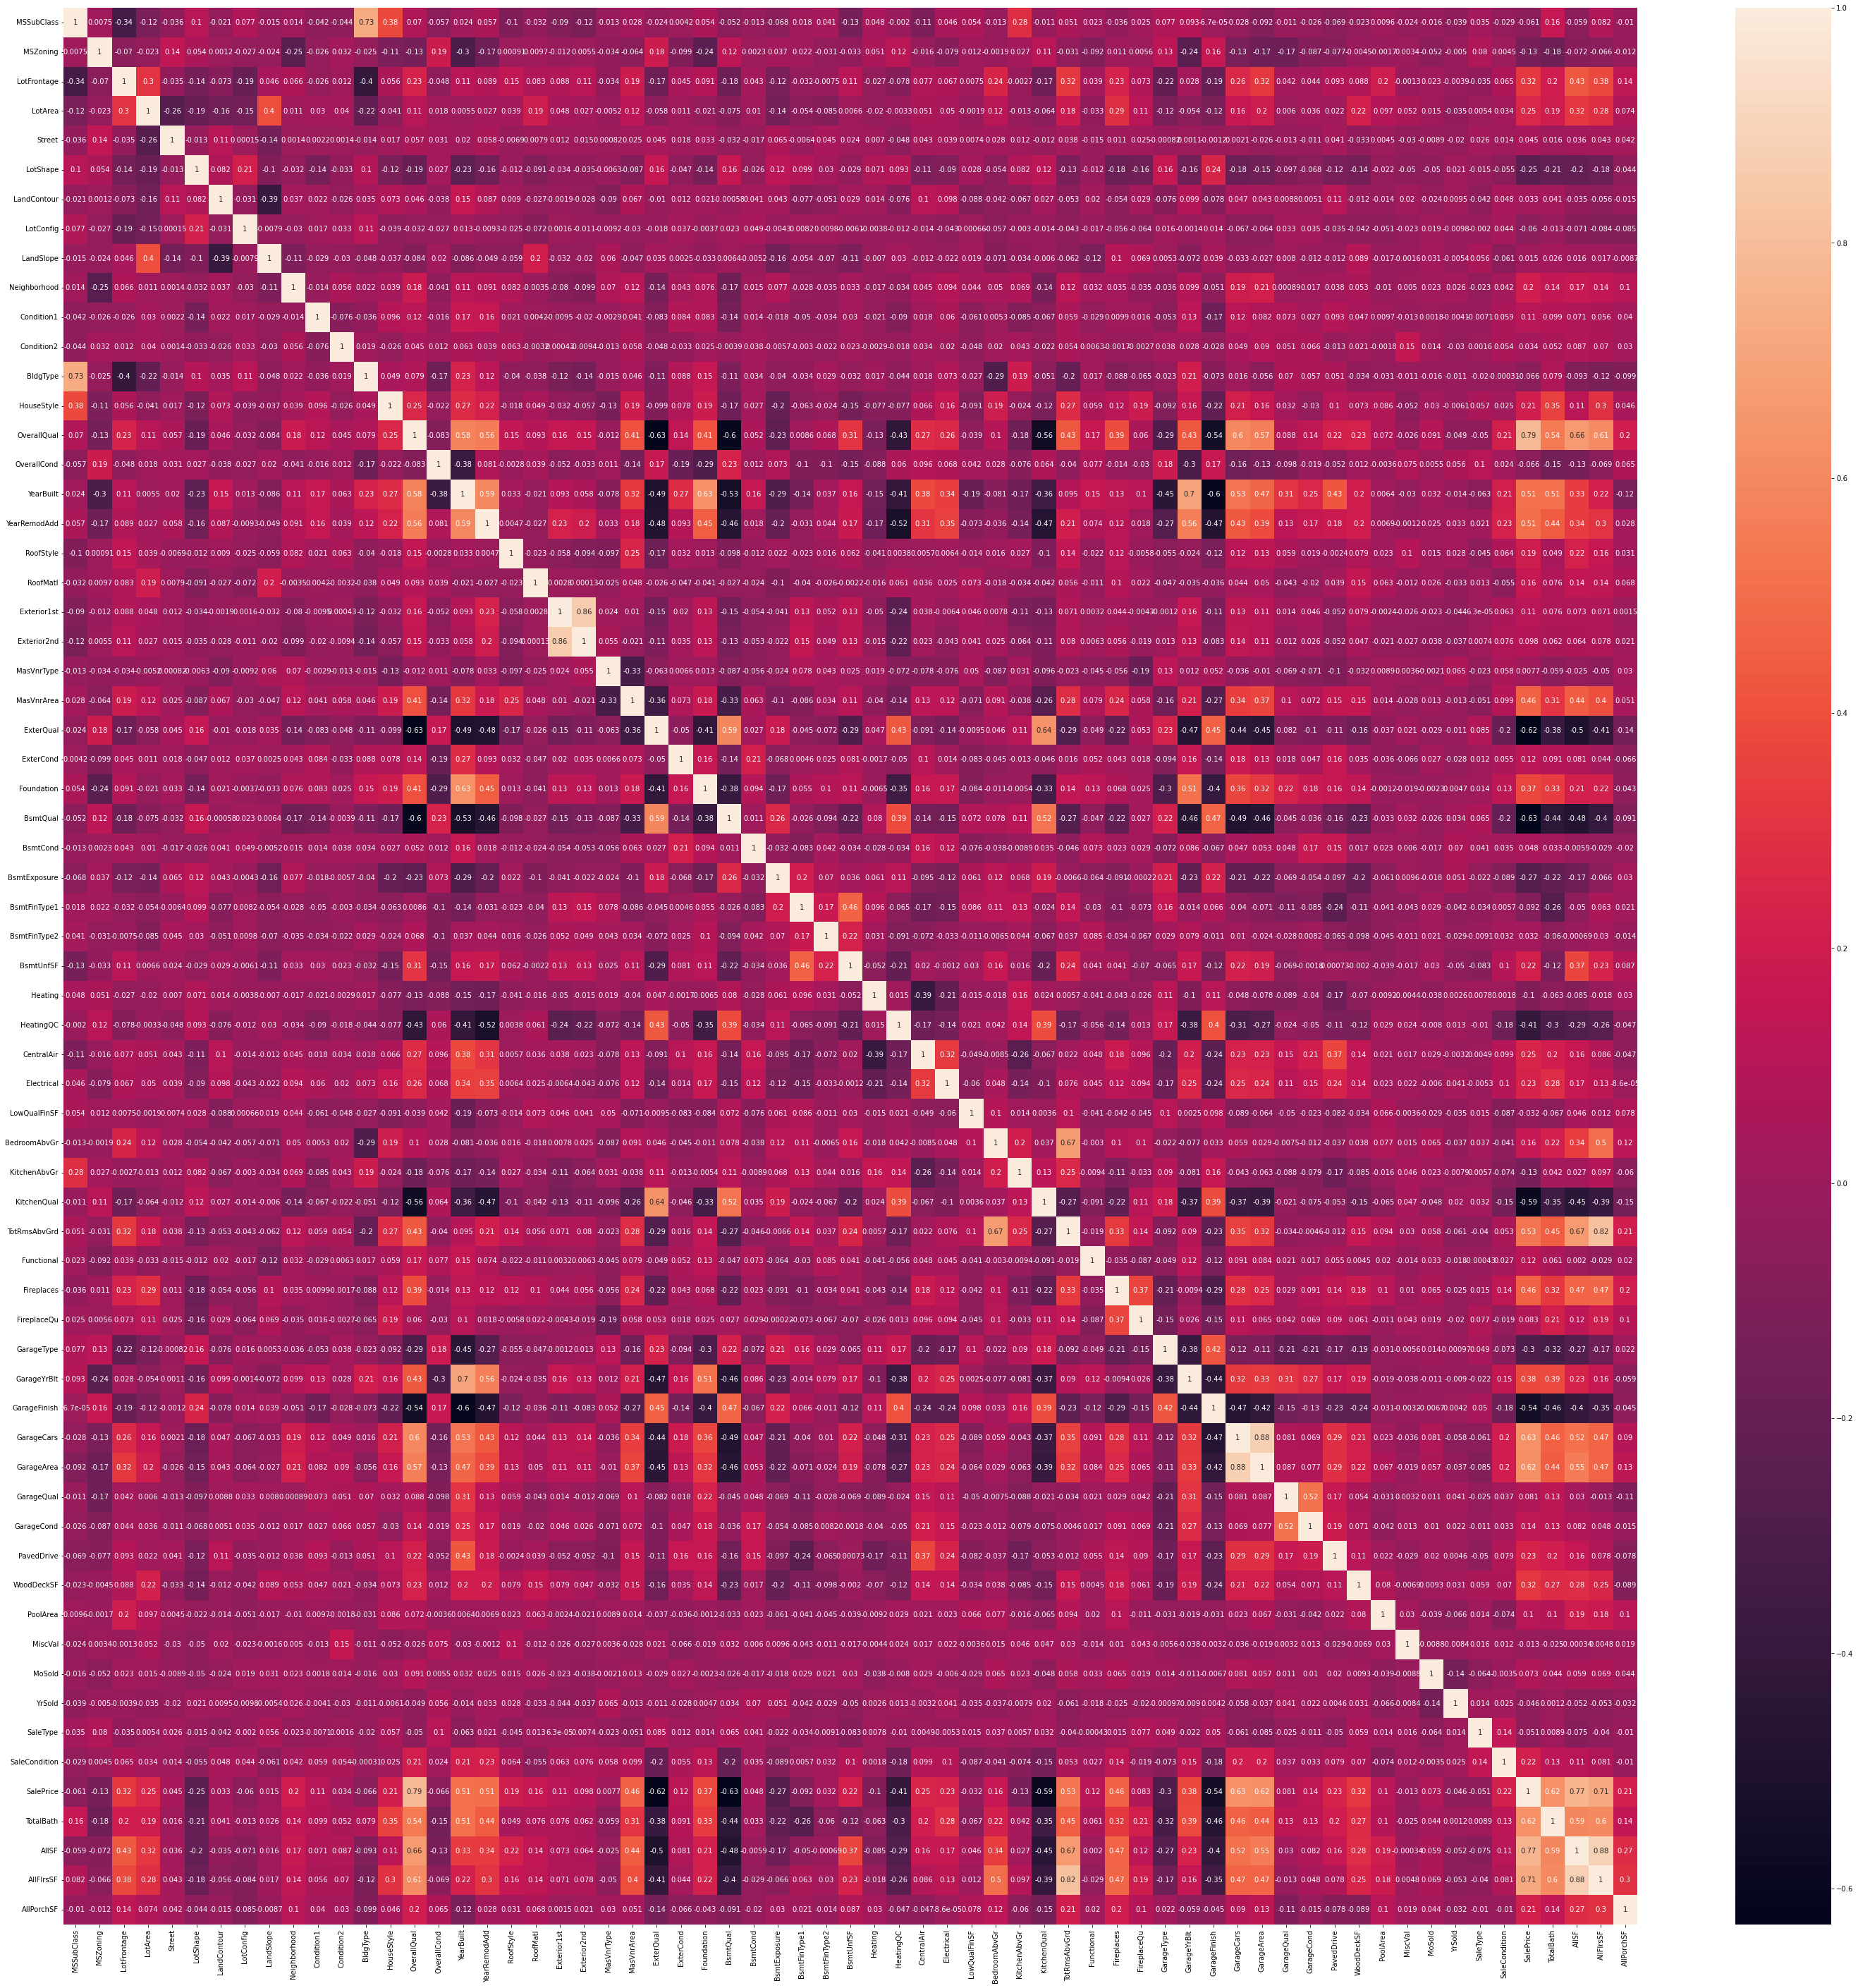

In [41]:
#multivariate analysis
df_corr = df_train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True)
plt.show()

extrior 1 and exterior 2 have good correlation among themselves.
yearbuilt is showing good correlation with foundation, garage year built,garage cars.
overall quality is showing good correlation with totalbath,allsf,allflrssf,saleprice.
garage area and gaarage cars have good correlation among themselves.

# Outliers Detection .

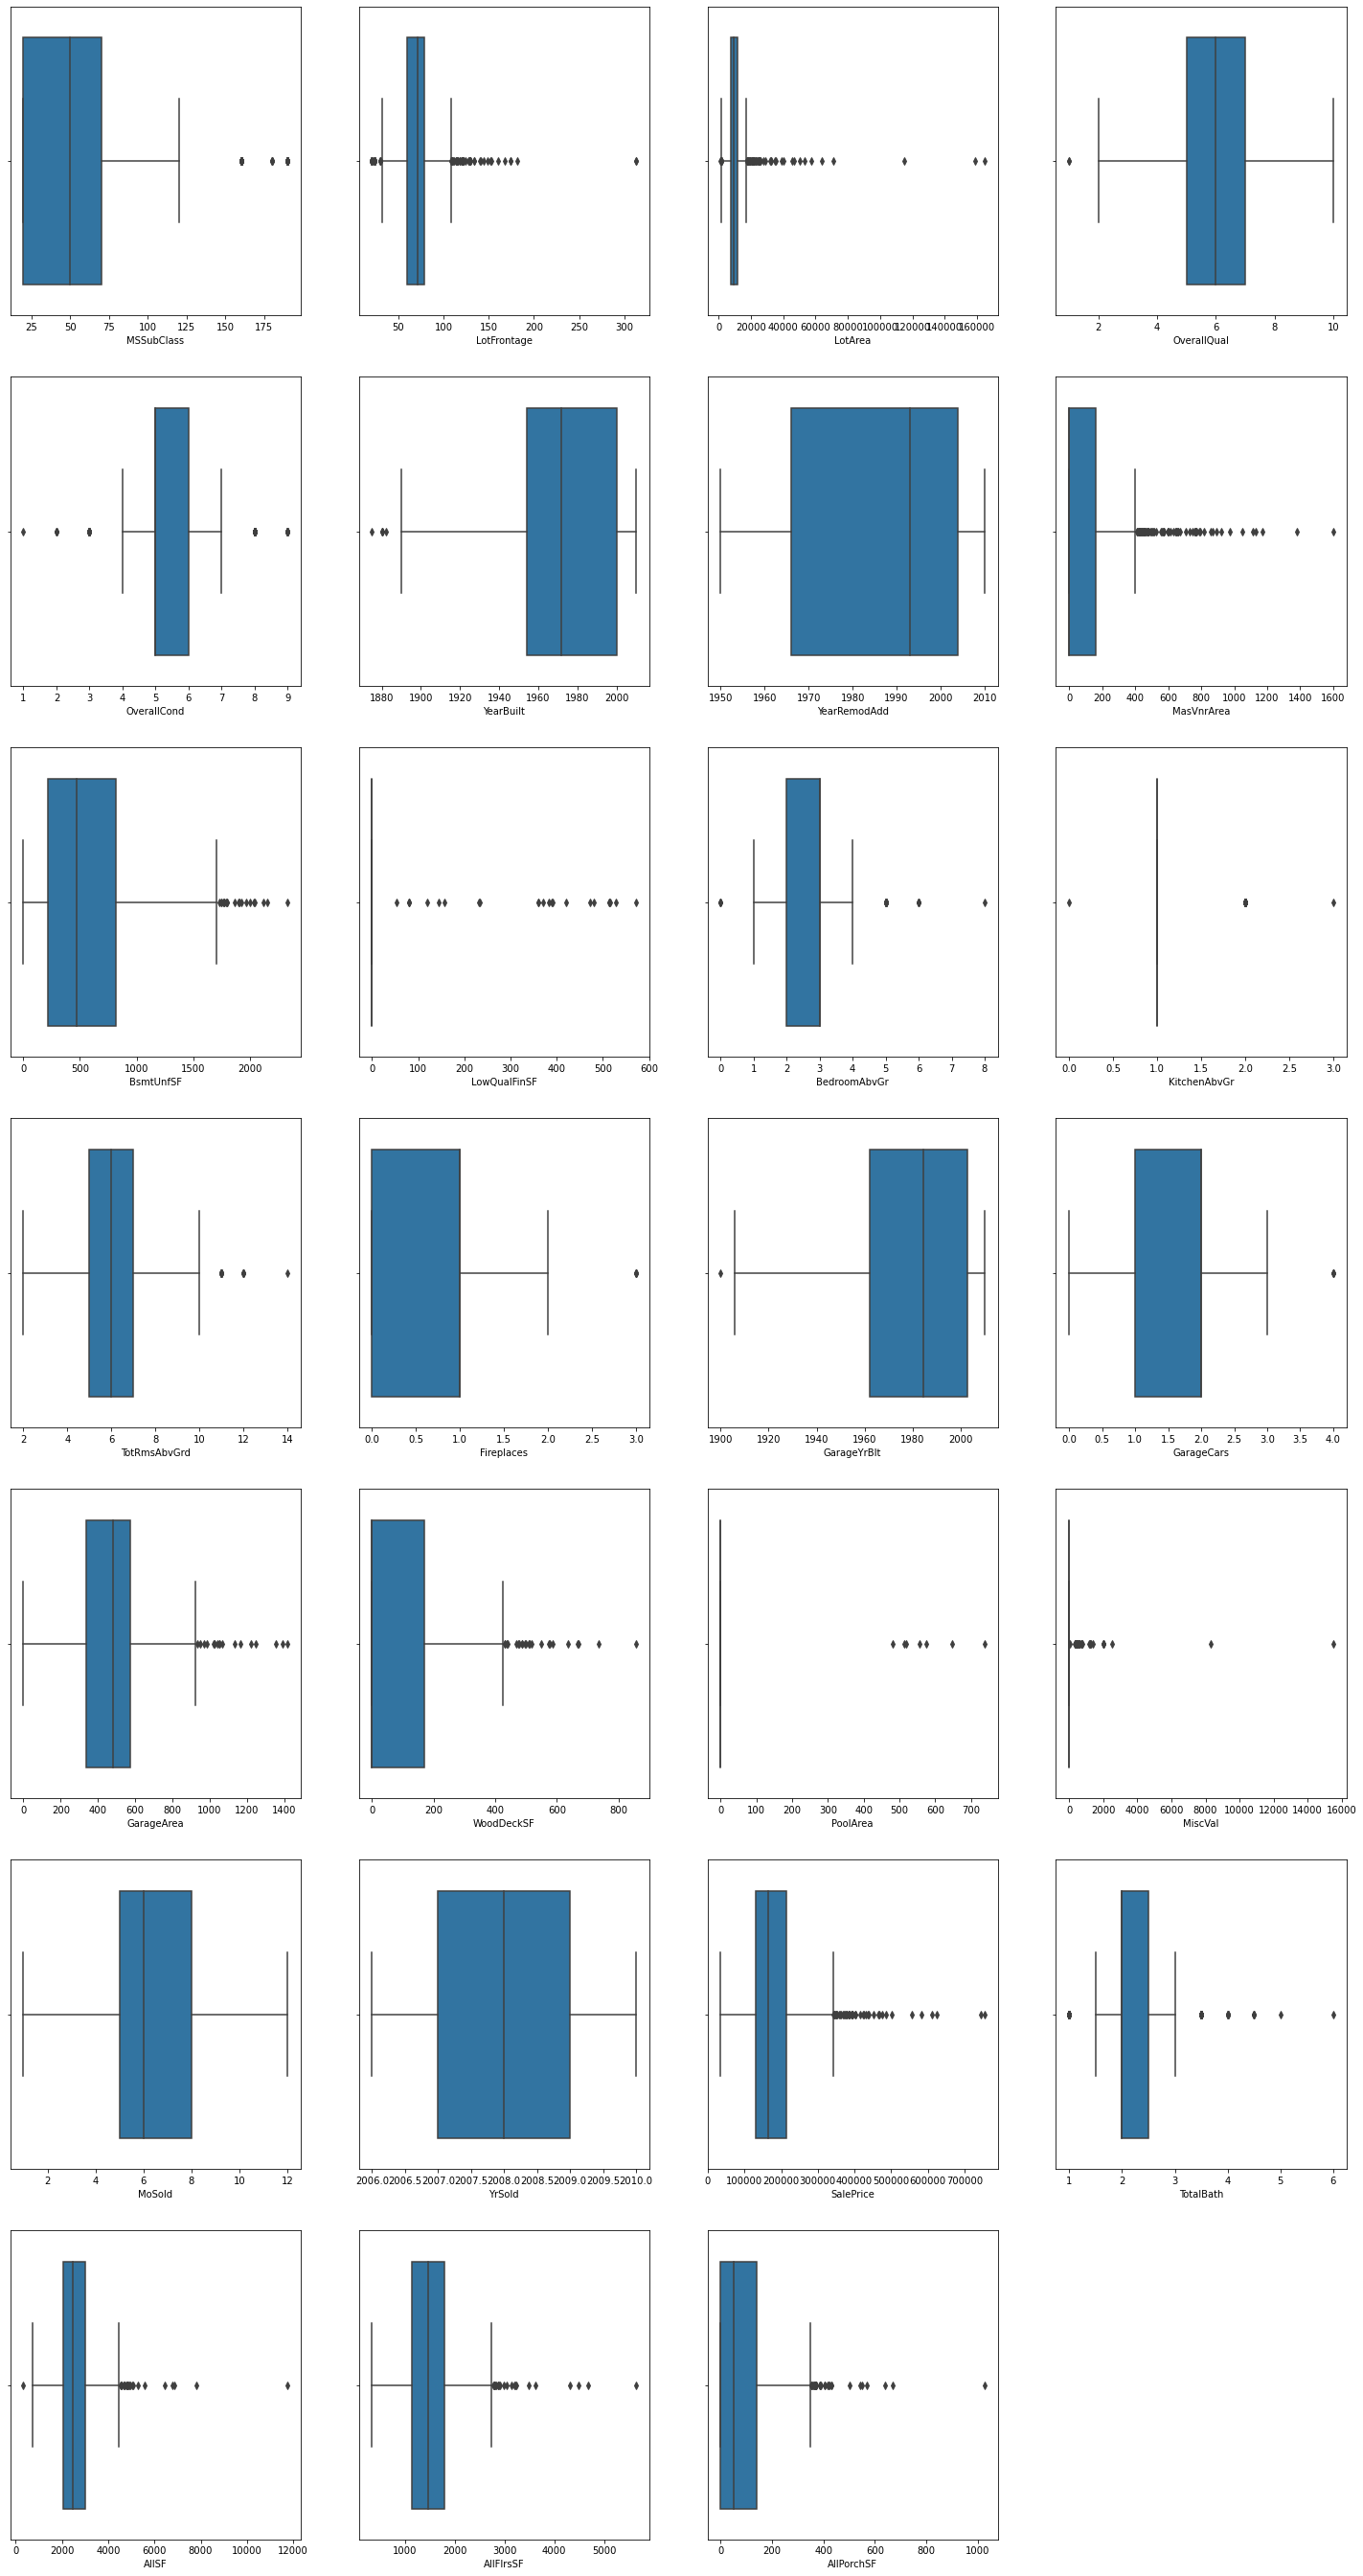

In [42]:
#plotting box plot to see outliers
plt.figure(figsize=(25,70))
plotnumber = 1
for i in df_train[numerical]:
    if plotnumber < 40:
        plt.subplot(10,4,plotnumber)
        sns.boxplot(df_train[i])
        plotnumber+=1
plt.show()

most of the column have outlier, but losing too much data for removing outlier is not a good practice, 10% dataloss is what we can afford to loose.

In [43]:
# for removing outliers
from scipy.stats import zscore

In [44]:
zscr=zscore(df_train[['MSSubClass','LotFrontage','LotArea','AllSF', 'AllFlrsSF', 'AllPorchSF','MasVnrArea', 'BsmtUnfSF','SalePrice']])
abs_score=np.abs(zscr)

In [45]:
filter=((abs_score<3)).all (axis=1)

In [46]:
df_train=df_train[filter]

In [47]:
df_train.shape

(1067, 65)

In [48]:
print("Data Loss percent is :",((1168-1067)/1000)*100)

Data Loss percent is : 10.100000000000001


In [49]:
#creating new column and taking only those column which have more than 10 unique
new=[]
for i in df_train[numerical]:
    if df_train[i].nunique() > 10:
        new.append(i)

In [50]:
# checking skewness in dataset
df_train[new].skew().to_frame()

0
MSSubClass     1.259668
LotFrontage    0.111401
LotArea        1.053178
YearBuilt     -0.540706
YearRemodAdd  -0.459882
MasVnrArea     1.697400
BsmtUnfSF      0.779650
LowQualFinSF   9.336492
TotRmsAbvGrd   0.497778
GarageYrBlt   -0.658307
GarageArea    -0.056980
WoodDeckSF     1.398794
MiscVal       22.585784
MoSold         0.252172
SalePrice      0.895529
AllSF          0.303528
AllFlrsSF      0.565288
AllPorchSF     1.194521

there is major skewness in lotarea,misval,lowqualfinsf in these column need to take care of it

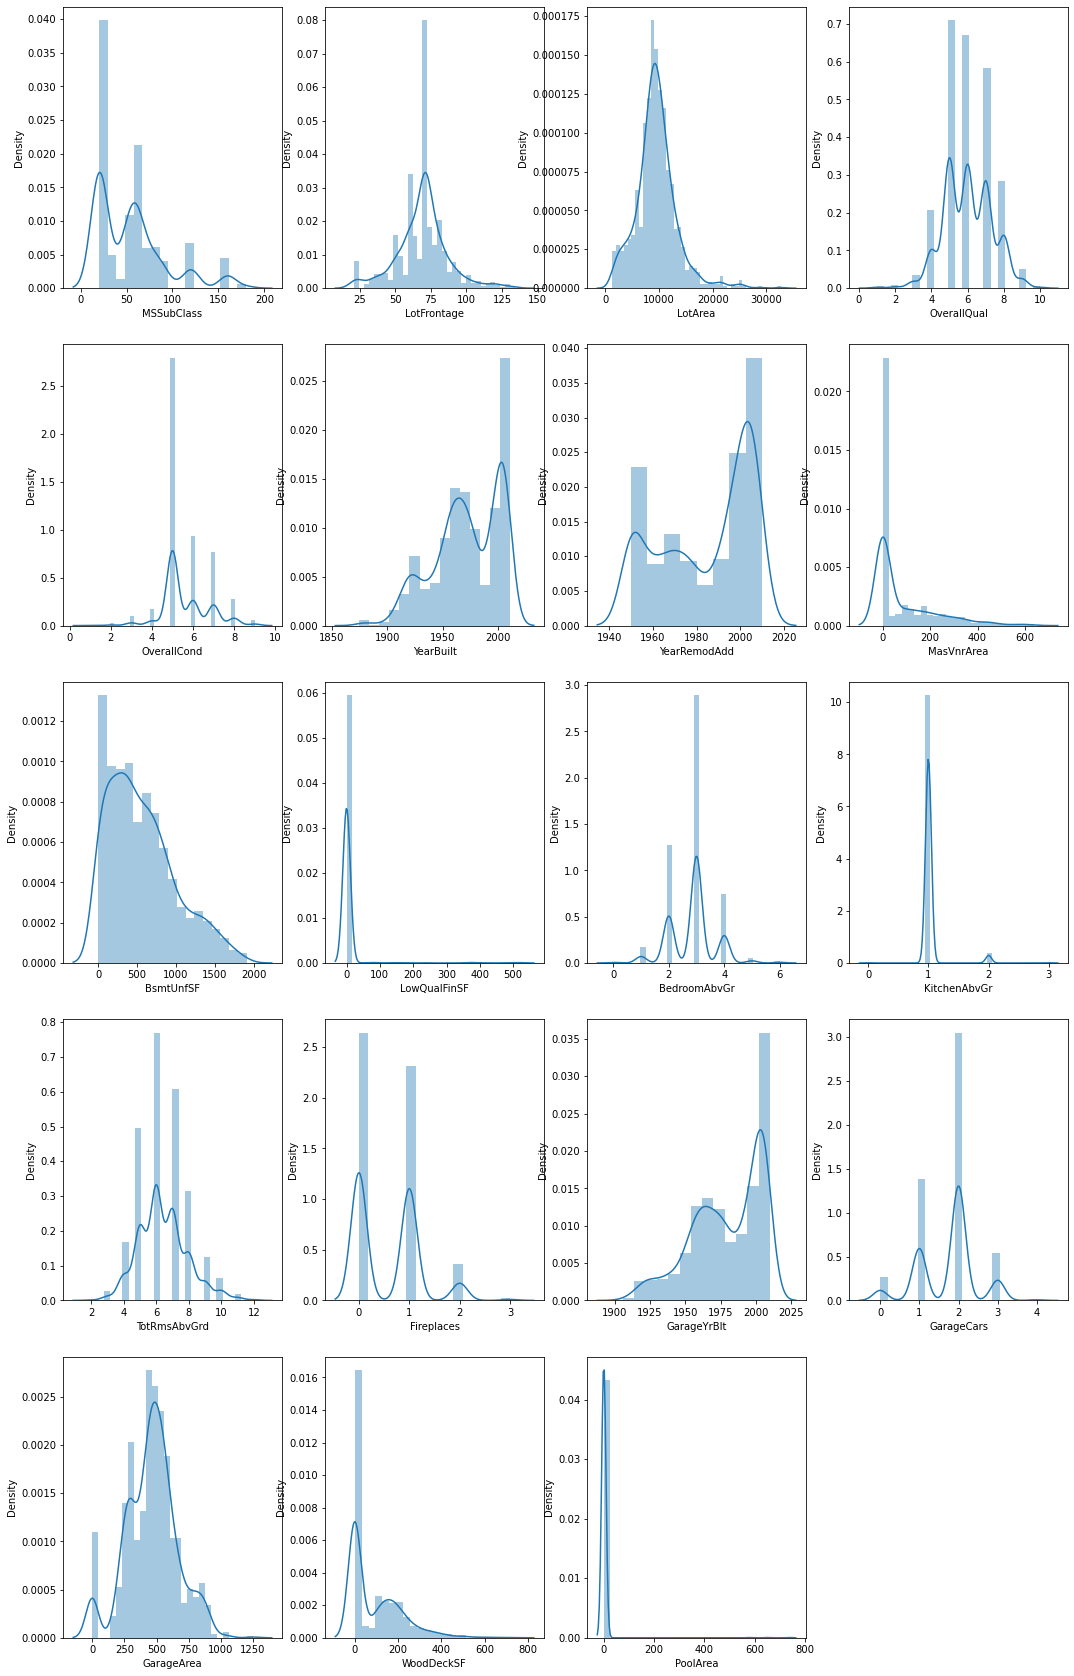

In [51]:
# using plot to see skewness
plotnumber =1
plt.figure(figsize=(18,30))
for i in df_train[numerical]:
    if plotnumber < 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_train[i])
        plotnumber+=1
plt.show()

In [52]:
skew=['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'WoodDeckSF',
       'AllSF', 'AllFlrsSF', 'AllPorchSF',"LotFrontage","MiscVal","LowQualFinSF"]

In [53]:
df_train[skew].columns

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'WoodDeckSF',
       'AllSF', 'AllFlrsSF', 'AllPorchSF', 'LotFrontage', 'MiscVal',
       'LowQualFinSF'],
      dtype='object')

In [54]:
# for takinng care of skewness we use power transform
from sklearn.preprocessing import PowerTransformer

In [55]:
pt = PowerTransformer()
df_train[skew]= pt.fit_transform(df_train[skew])

In [56]:
df_train[new].skew().to_frame()

0
MSSubClass    0.058381
LotFrontage   0.118890
LotArea       0.116794
YearBuilt    -0.540706
YearRemodAdd -0.459882
MasVnrArea    0.442342
BsmtUnfSF    -0.325704
LowQualFinSF  7.302459
TotRmsAbvGrd  0.497778
GarageYrBlt  -0.658307
GarageArea   -0.056980
WoodDeckSF    0.131645
MiscVal       5.093789
MoSold        0.252172
SalePrice     0.895529
AllSF         0.016286
AllFlrsSF    -0.005996
AllPorchSF   -0.233010

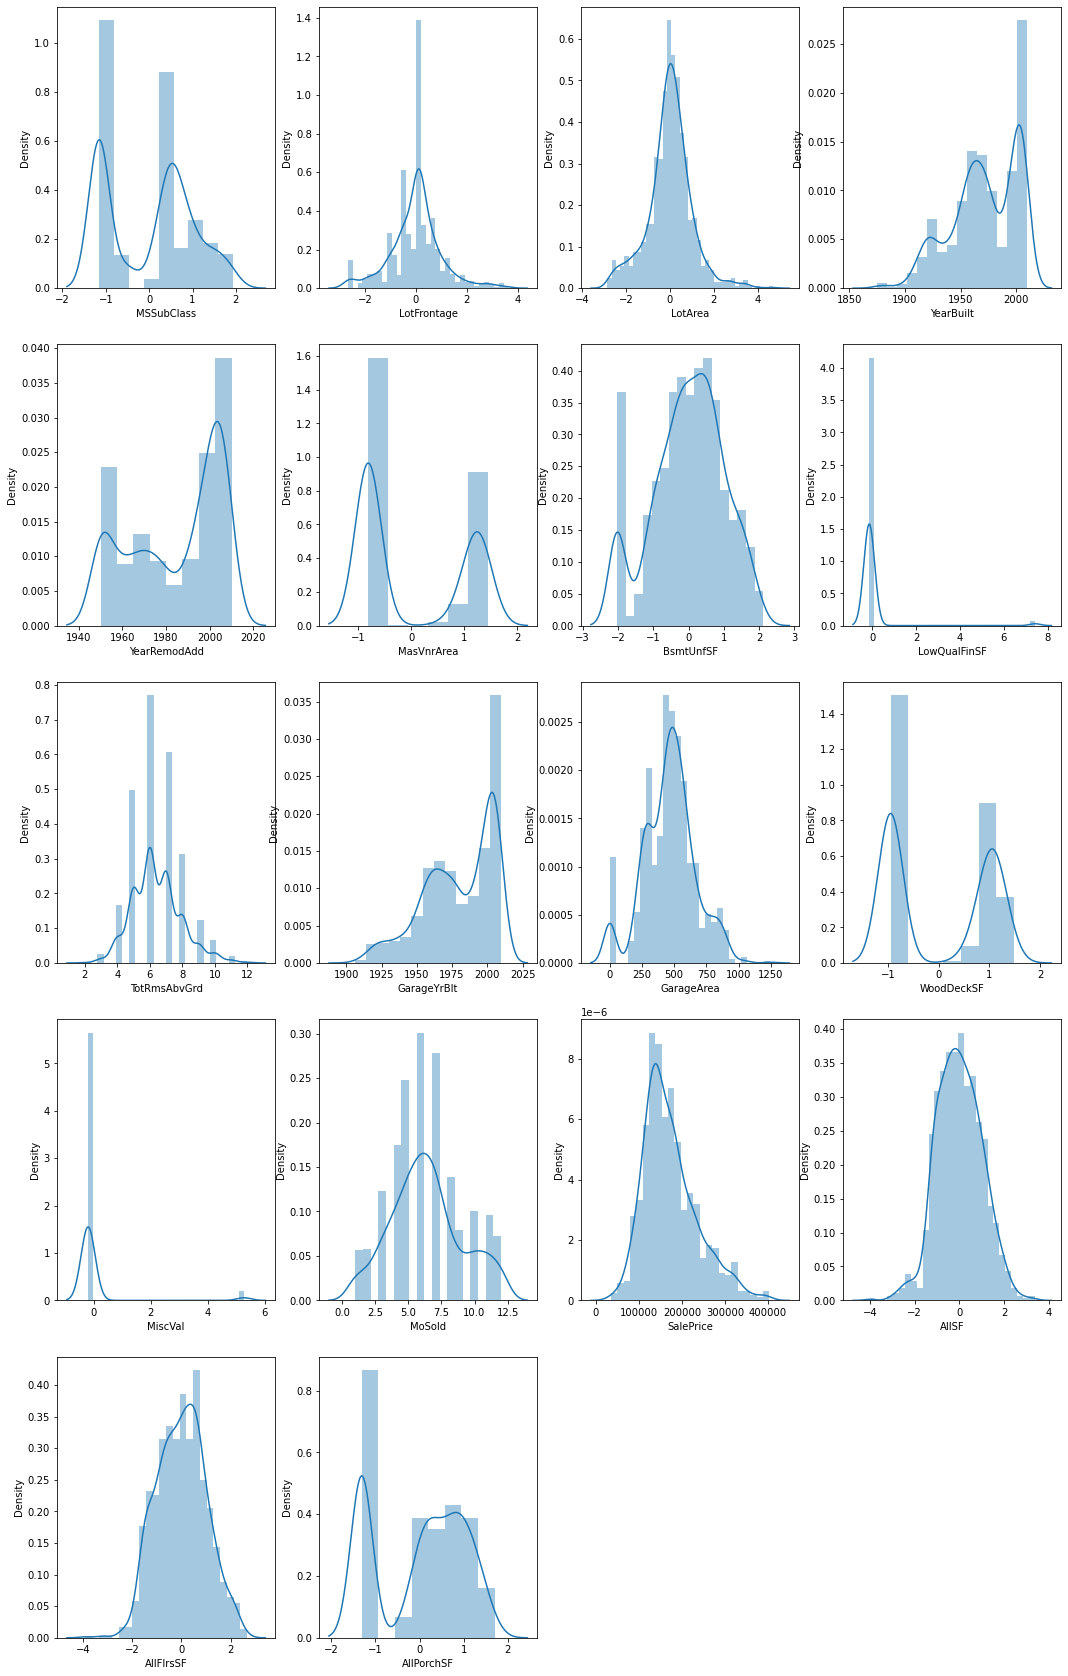

In [57]:
plotnumber =1
plt.figure(figsize=(18,30))
for i in df_train[new]:
    if plotnumber < 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_train[i])
        plotnumber+=1
plt.show()

only two column is showing skewness i.e is because it mostly contains zeros in it

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

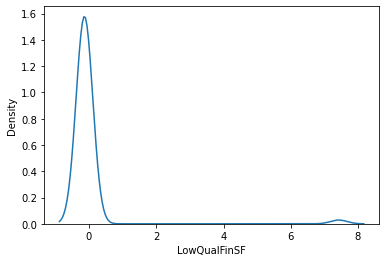

In [58]:
sns.kdeplot(df_train["LowQualFinSF"])

it contains mostly zeros that is why it is showing skewness

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

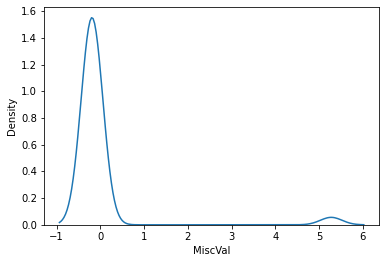

In [59]:
sns.kdeplot(df_train["MiscVal"])

it contains mostly zeros that is why it is showing skewness

# testing dataset

In [60]:
# checking basis summary of dataset
df_test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   292.000000   292.000000    292.000000   291.000000   292.000000   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521   
std       1.063267    30.447016     20.105792   175.030021   429.559675   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean     46.157534   557.315068  1042.767123  1133.691781   339.657534   
std     152.467119   411.043768   424.561153   366.941919   424.278825   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   255.000000   771.750000   858.000000     0.000000   
50%       0.000000   487.000000   971.000000  1047.500000     0.000000   
75%       0.000000   780.000000  1322.000000  1370.500000   717.000000   
max    1085.000000  1935.000000  3094.000000  2402.000000  1589.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000   292.000000    292.000000    292.000000  292.000000   
mean       3.702055  1477.051370      0.424658      0.065068    1.575342   
std       38.219527   514.199429      0.508831      0.247070    0.547856   
min        0.000000   520.000000      0.000000      0.000000    0.000000   
25%        0.000000  1061.500000      0.000000      0.000000    1.000000   
50%        0.000000  1440.000000      0.000000      0.000000    2.000000   
75%        0.000000  1720.250000      1.000000      0.000000    2.000000   
max      479.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   275.000000  292.000000   292.000000  292.000000   292.000000   
mean   1979.760000    1.729452   457.458904   86.397260    47.061644   
std      23.868875    0.754430   210.785591  121.898836    65.865449   
min    1916.000000    0.000000     0.000000    0.000000     0.000000   
25%    1964.000000    1.000000   300.000000    0.000000     0.000000   
50%    1979.000000    2.000000   467.500000    0.000000    28.500000   
75%    2003.000000    2.000000   569.750000  149.250000    66.000000   
max    2010.000000    4.000000  1052.000000  728.000000   41

In [61]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
#droping columns
df_test.drop(columns =["Alley", "Id", "Fence","PoolQC", "MiscFeature"],axis=1,inplace=True)

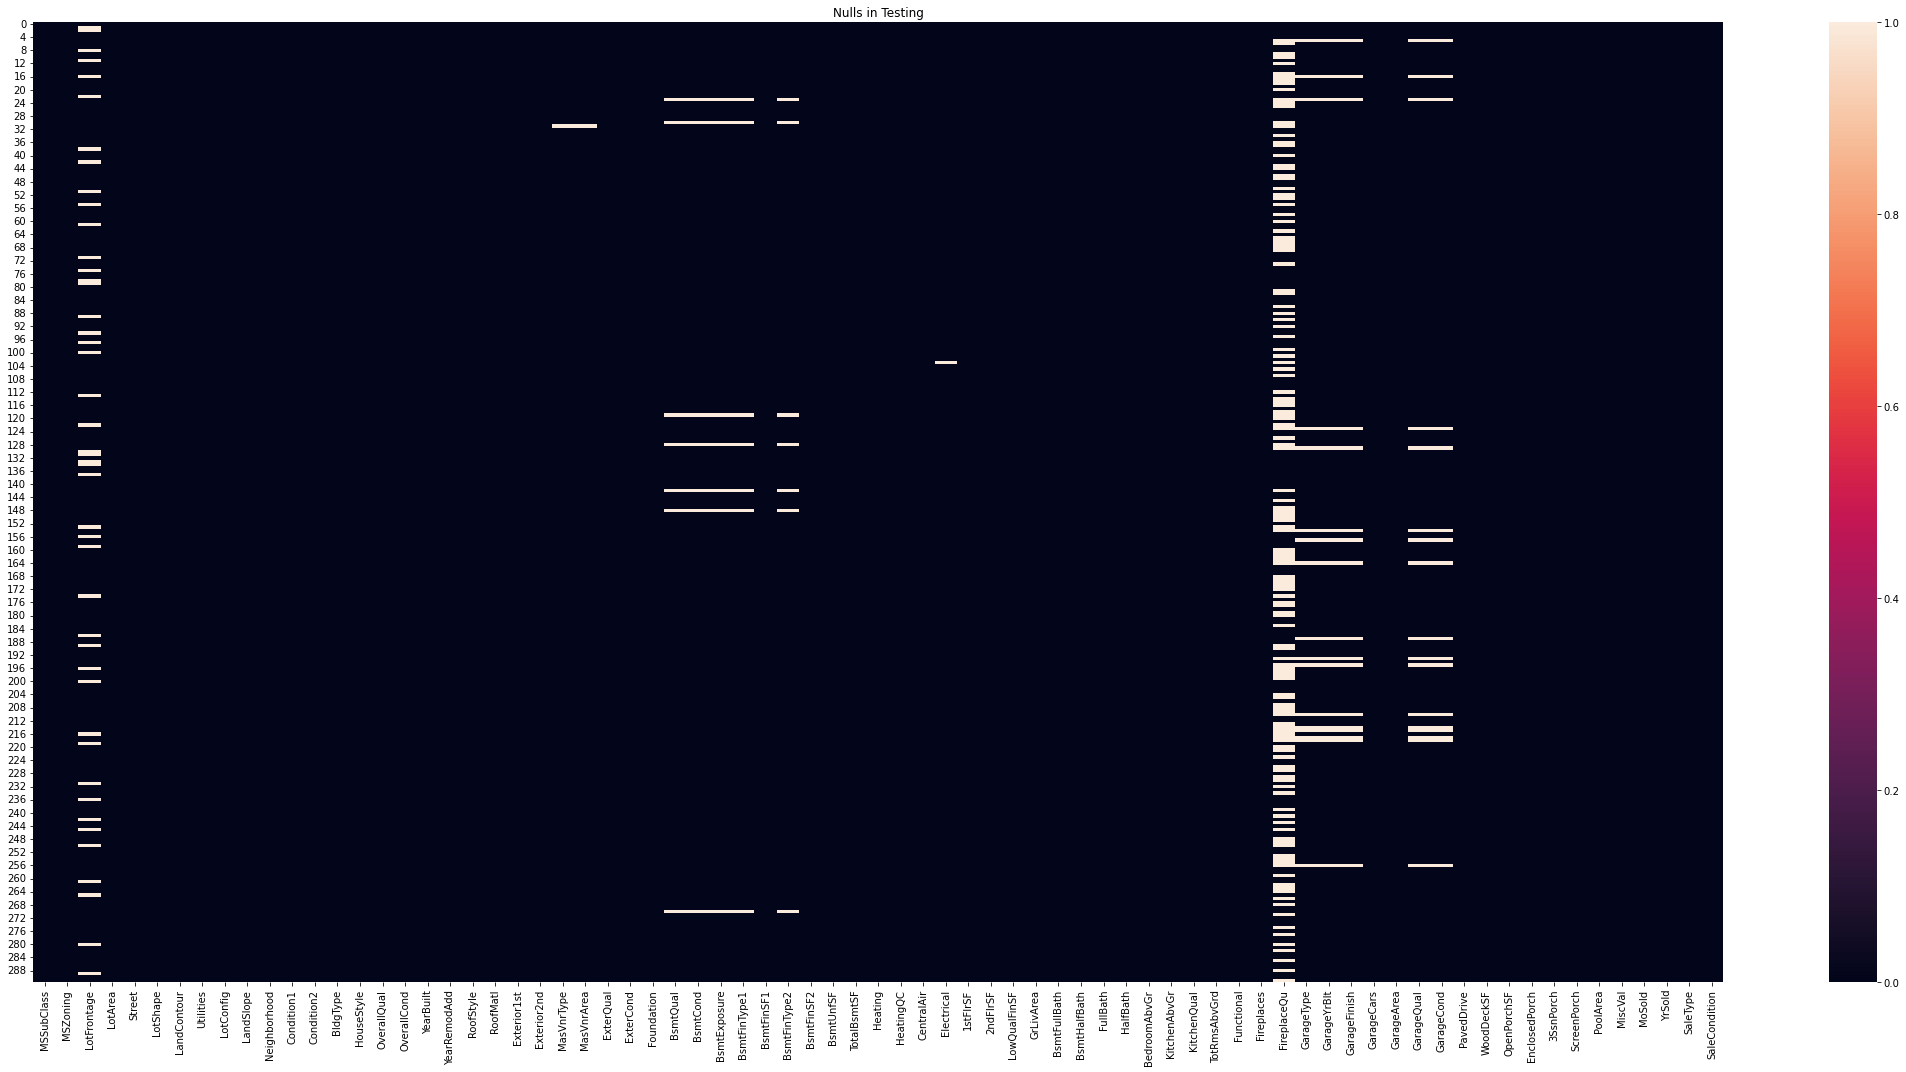

In [63]:
# Visualizing null values in train dataset
plt.figure(figsize=[30,15])
sns.heatmap(df_test.isnull())
plt.title("Nulls in Testing")
plt.tight_layout()

In [64]:
# filling missing value with mode
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

In [65]:
# filling missing value with mean
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [66]:
#Adding new features to train data
# Total number of bathrooms
df_test["TotalBath"] = df_test["BsmtFullBath"] + (0.5 * df_test["BsmtHalfBath"]) + df_test["FullBath"] + (0.5 * df_test["HalfBath"])


# Total SF for house (incl. basement)
df_test["AllSF"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]


# Total SF for 1st + 2nd floors
df_test["AllFlrsSF"] = df_test["1stFlrSF"] + df_test["2ndFlrSF"]


# Total SF for porch
df_test["AllPorchSF"] = df_test["OpenPorchSF"] + df_test["EnclosedPorch"] +df_test["3SsnPorch"] + df_test["ScreenPorch"]



In [67]:
# dropping  unwanted column as these column has been merged above to form new column 
df_test.drop(columns=["OpenPorchSF","Utilities","EnclosedPorch","3SsnPorch","ScreenPorch","1stFlrSF","2ndFlrSF","GrLivArea","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BsmtFinSF1","BsmtFinSF2"],axis=1,inplace=True)

In [68]:
# making two variable for categorical and continuous features
num=[]
cat=[]
type = ['int64','float64']
for i in df_test:
    if df_test[i].dtypes in type:
        num.append(i)
    else:
        cat.append(i)

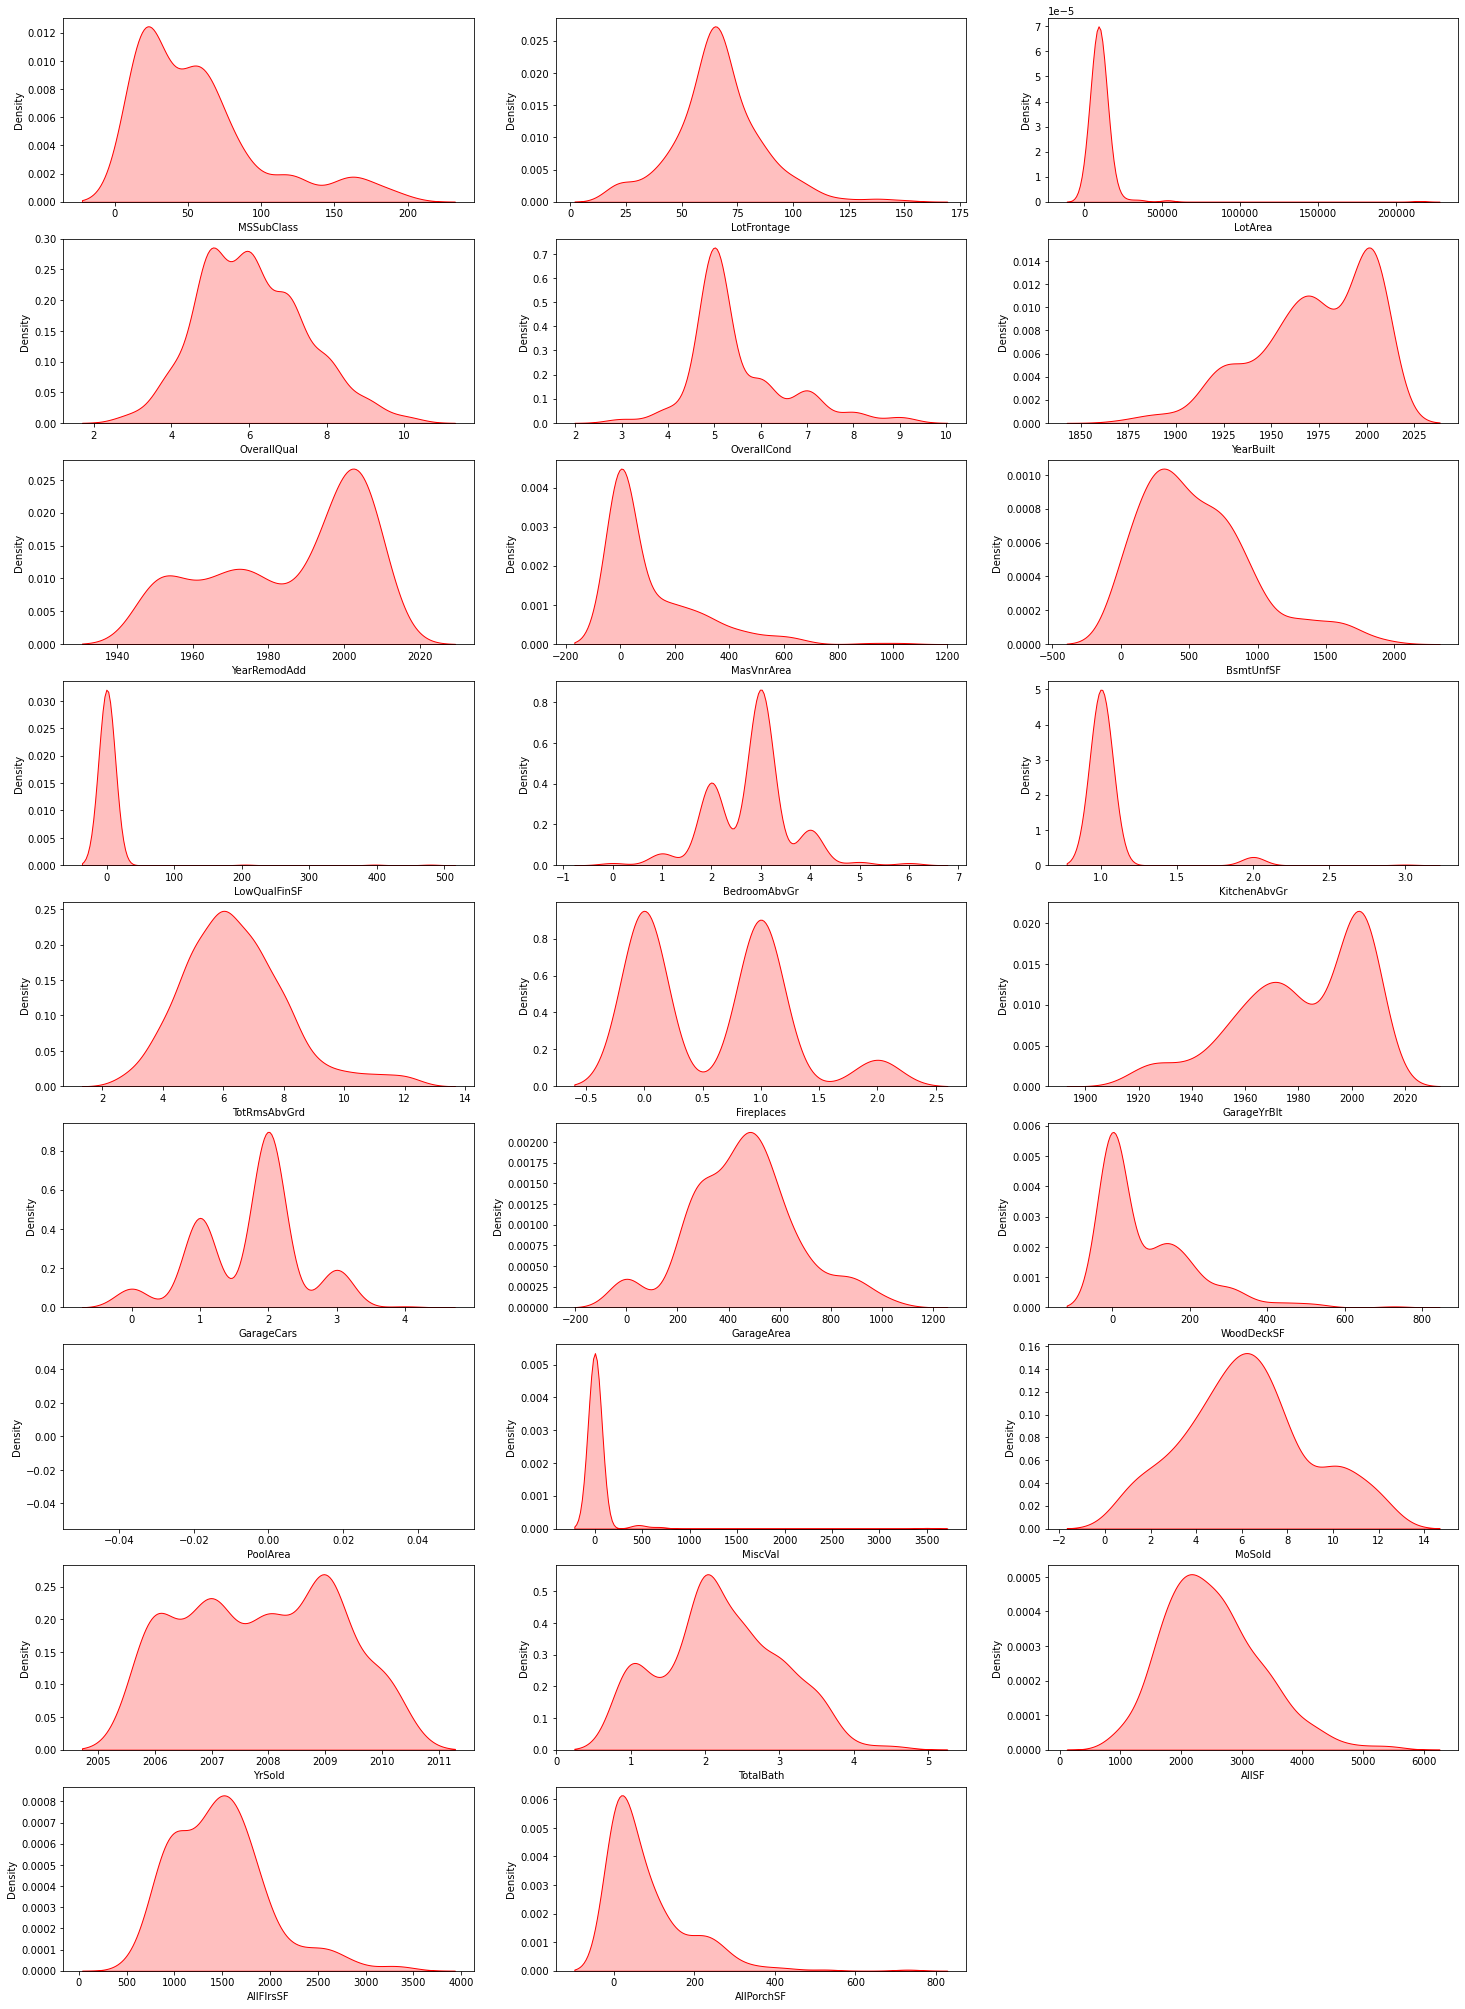

In [69]:
plotnumber = 1
plt.figure(figsize=(25,40))
for i in df_test[num]:
    if plotnumber < 30:
        ax = plt.subplot(10,3,plotnumber)
        sns.kdeplot(df_test[i],data=df_test,color='r',fill=True)
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

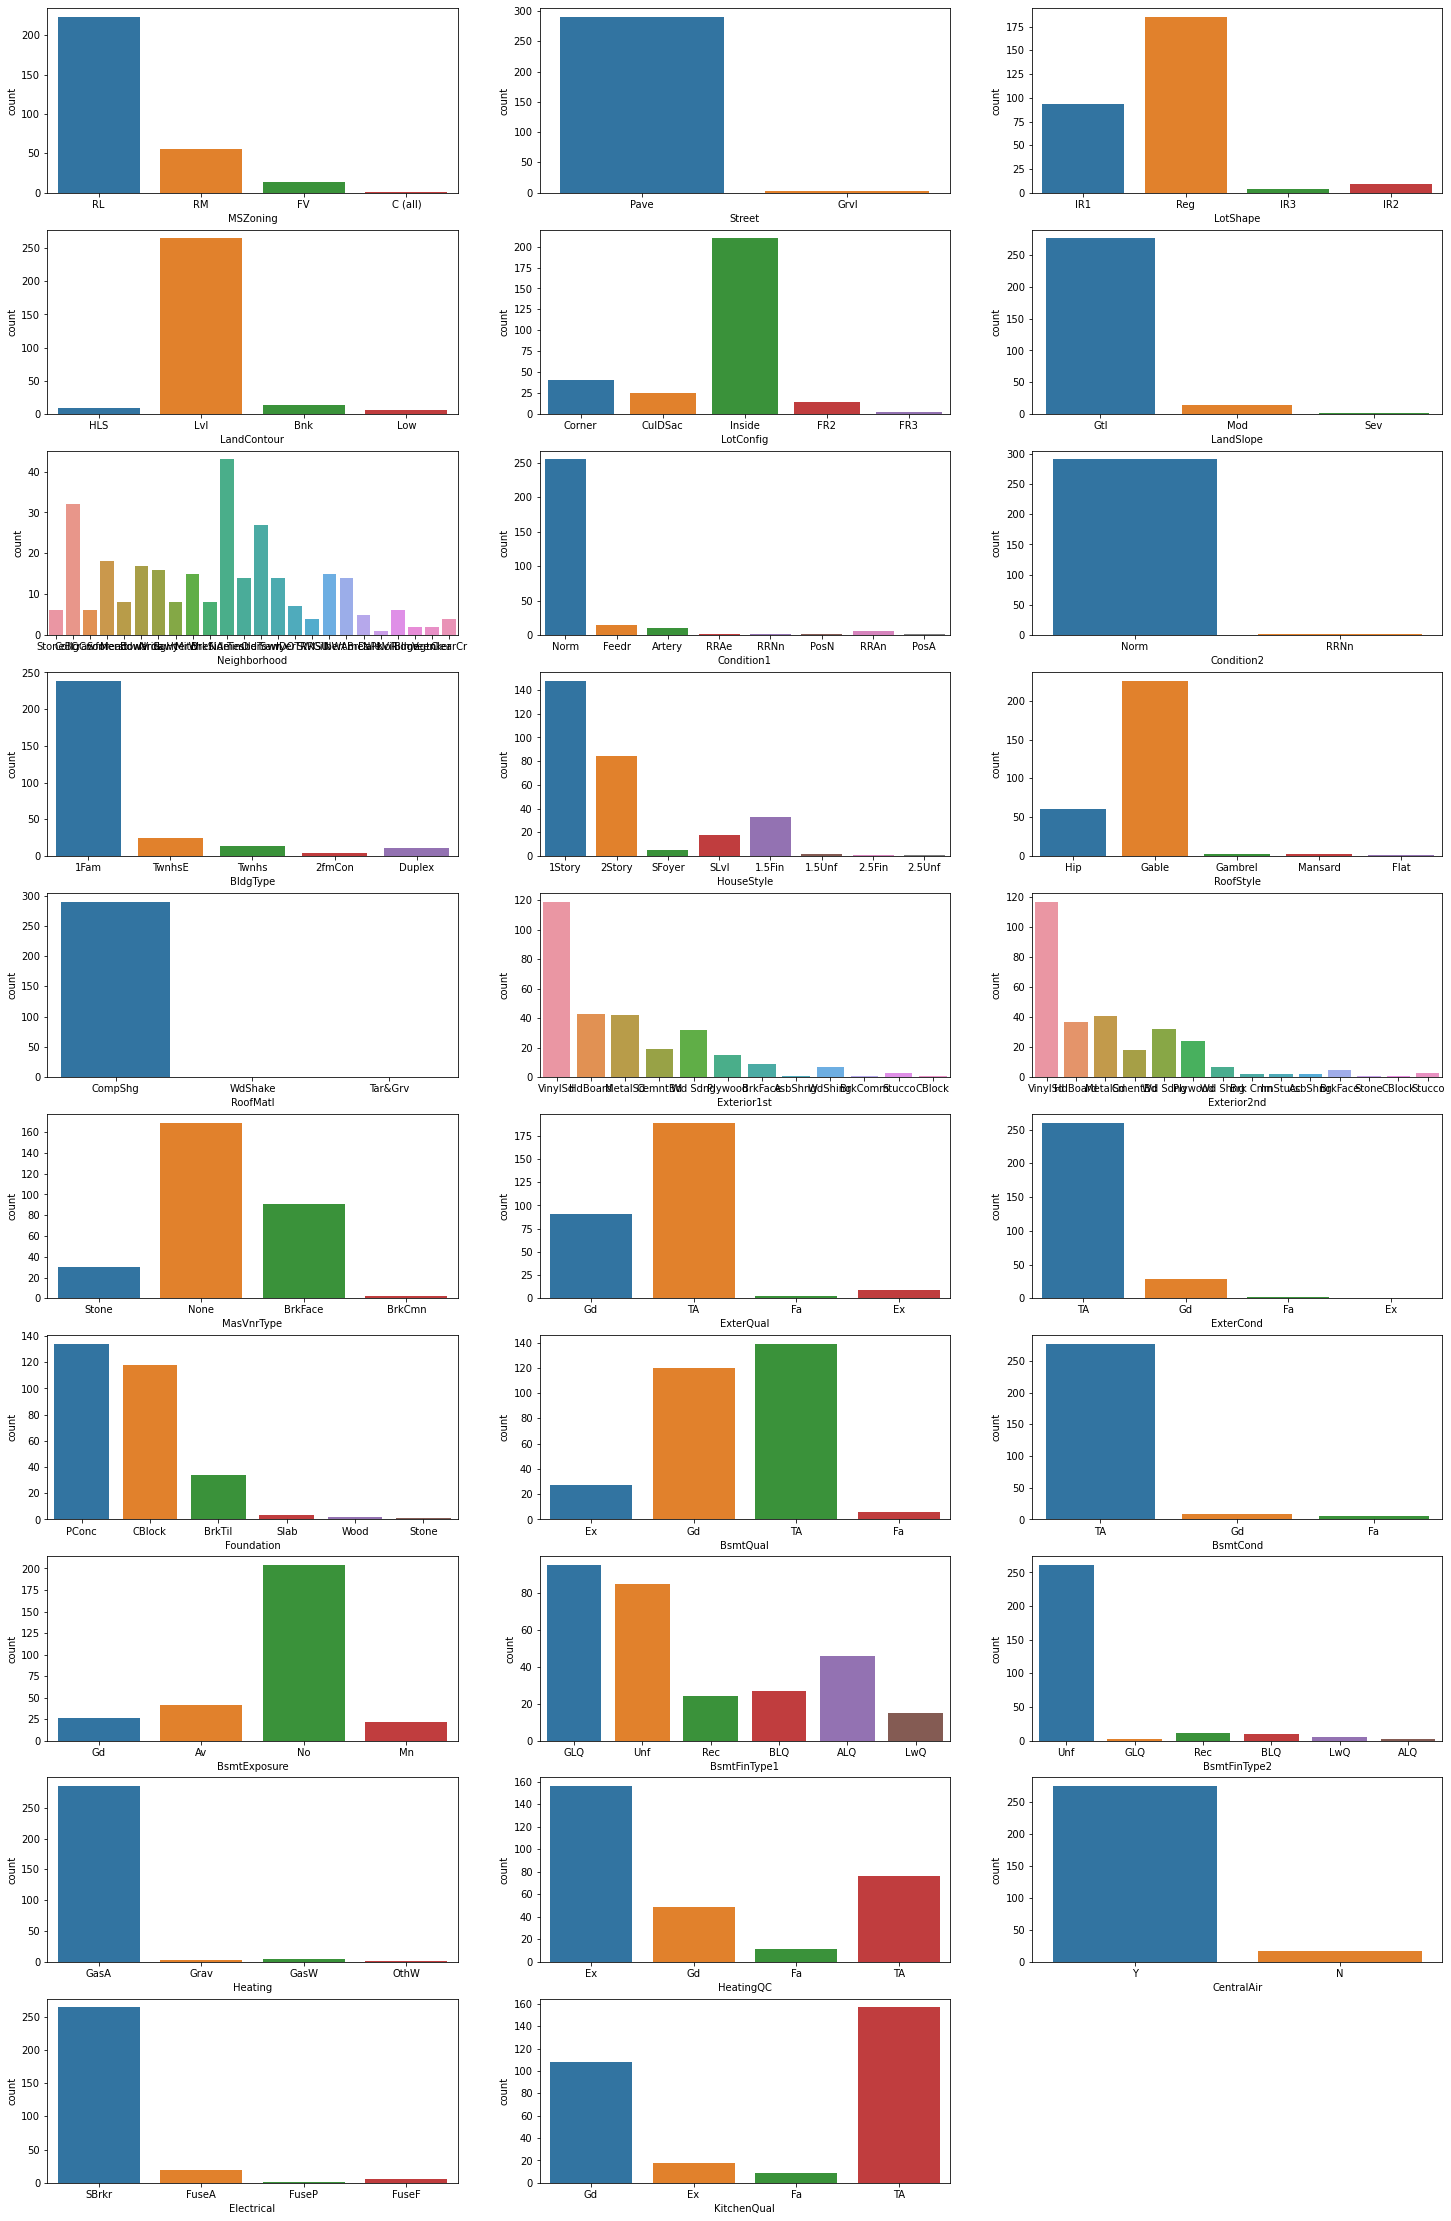

In [70]:
plotnumber = 1
plt.figure(figsize=(25,40))
for i in df_test[cat]:
    if plotnumber < 30:
        ax = plt.subplot(10,3,plotnumber)
        sns.countplot(df_test[i],data=df_test,fill=True)
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

In [71]:
# using label encoder for categorical column
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in df_test[cat]:
    df_test[i] = lab_enc.fit_transform(df_test[i])

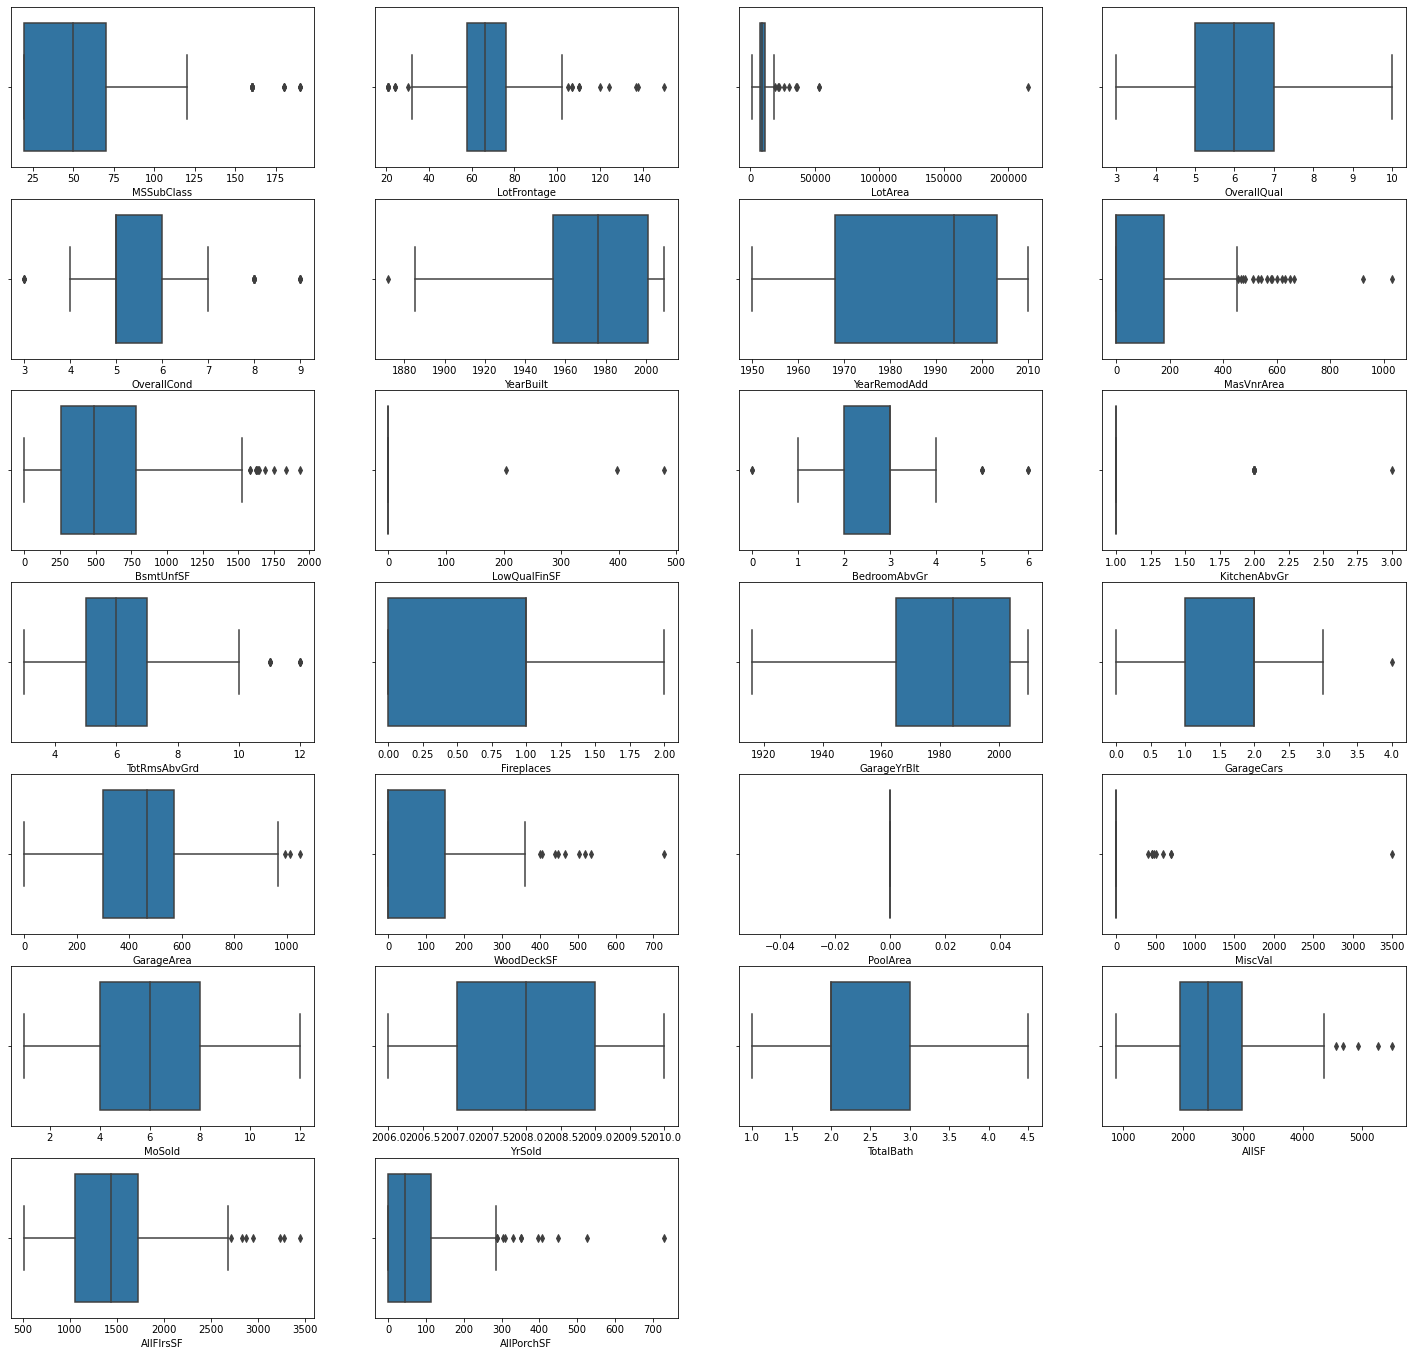

In [72]:
#plotting box plot to see outliers
plt.figure(figsize=(25,70))
plotnumber = 1
for i in df_test[num]:
    if plotnumber < 78:
        plt.subplot(20,4,plotnumber)
        sns.boxplot(df_test[i])
        plotnumber+=1
plt.show()

In [73]:
# for removing outliers
from scipy.stats import zscore

In [74]:
zscr=zscore(df_test[['MSSubClass','LotFrontage','LotArea','AllSF', 'AllFlrsSF', 'AllPorchSF','MasVnrArea', 'BsmtUnfSF']])
abs_score=np.abs(zscr)

In [75]:
filter=((abs_score<3)).all (axis=1)

In [76]:
df_test=df_test[filter]

In [77]:
df_test.shape

(269, 64)

In [78]:
print("Data Loss percent is :",((272-269)/1000)*100)

Data Loss percent is : 0.3


In [79]:
#creating new column and taking only those column which have more than 10 unique
new=[]
for i in df_test[num]:
    if df_test[i].nunique() > 10:
        new.append(i)

In [80]:
# checking skewness in dataset
df_test[new].skew().to_frame()

0
MSSubClass    1.273437
LotFrontage  -0.077074
LotArea       1.687013
YearBuilt    -0.753174
YearRemodAdd -0.512116
MasVnrArea    1.531647
BsmtUnfSF     0.922479
GarageYrBlt  -0.737019
GarageArea    0.159729
WoodDeckSF    1.810562
MoSold        0.182729
AllSF         0.409581
AllFlrsSF     0.653695
AllPorchSF    1.227183

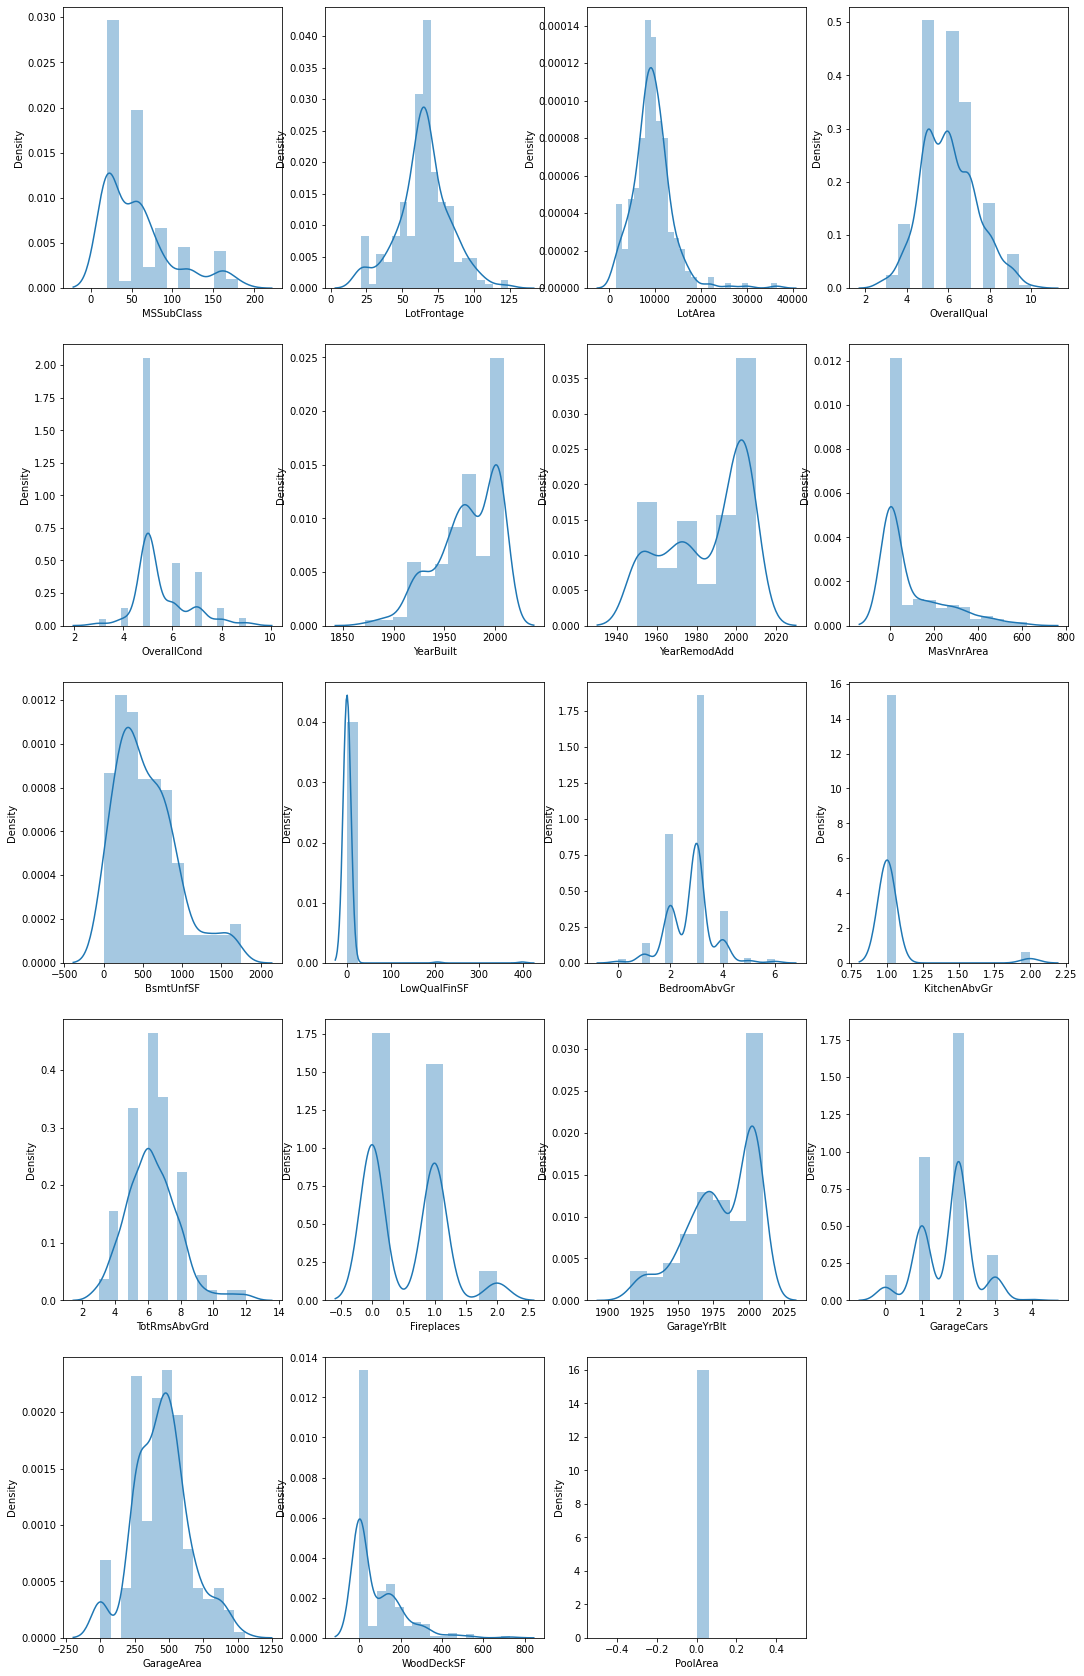

In [81]:
# using plot to see skewness
plotnumber =1
plt.figure(figsize=(18,30))
for i in df_test[num]:
    if plotnumber < 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_test[i])
        plotnumber+=1
plt.show()

In [82]:
skew=[]
for i in df_train[new]:
    if df_test[i].skew() > 0.5:
        skew.append(i)

In [83]:
# for takinng care of skewness we use power transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_test[skew]= pt.fit_transform(df_test[skew])

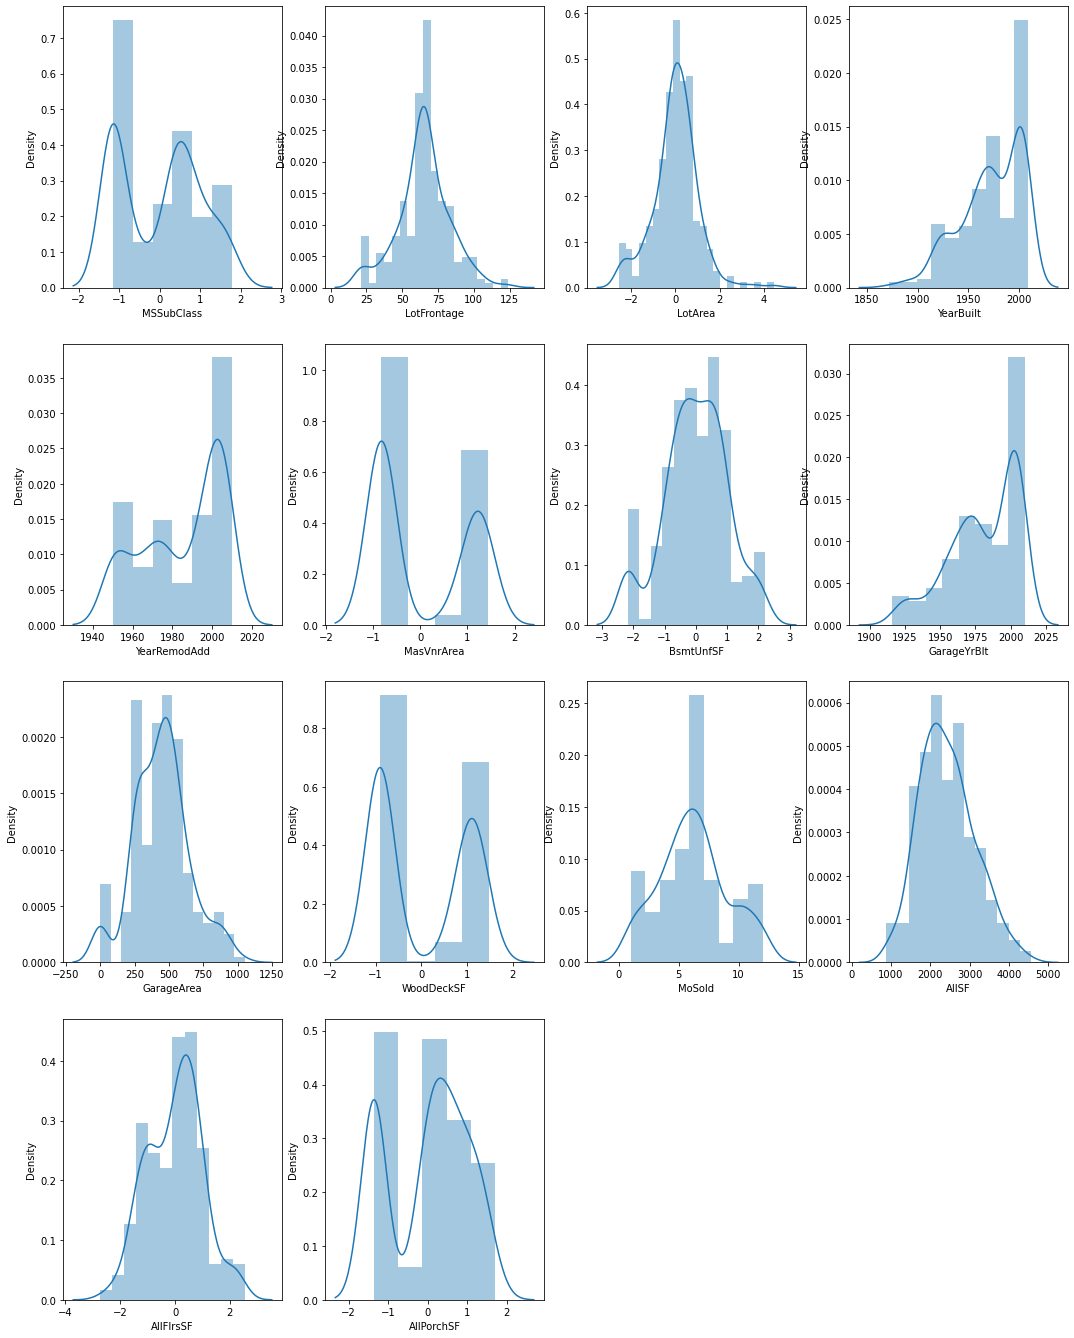

In [84]:
plotnumber =1
plt.figure(figsize=(18,30))
for i in df_test[new]:
    if plotnumber < 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_test[i])
        plotnumber+=1
plt.show()

In [85]:
# checking skewness in dataset
df_test[new].skew().to_frame()

0
MSSubClass    0.084742
LotFrontage  -0.077074
LotArea       0.124352
YearBuilt    -0.753174
YearRemodAdd -0.512116
MasVnrArea    0.408606
BsmtUnfSF    -0.232687
GarageYrBlt  -0.737019
GarageArea    0.159729
WoodDeckSF    0.230066
MoSold        0.182729
AllSF         0.409581
AllFlrsSF    -0.007274
AllPorchSF   -0.239328

In [86]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'TotalBath', 'AllSF', 'AllFlrsSF',
       'AllPorchSF'],
      dtype='object')

In [87]:
df_test.drop(columns=["PoolArea","MiscVal","LowQualFinSF"],axis=1,inplace=True)

In [88]:
df_train[new].skew().to_frame()

0
MSSubClass    0.058381
LotFrontage   0.118890
LotArea       0.116794
YearBuilt    -0.540706
YearRemodAdd -0.459882
MasVnrArea    0.442342
BsmtUnfSF    -0.325704
GarageYrBlt  -0.658307
GarageArea   -0.056980
WoodDeckSF    0.131645
MoSold        0.252172
AllSF         0.016286
AllFlrsSF    -0.005996
AllPorchSF   -0.233010

### Splitting the data :

In [89]:
#spliting dataset
x=df_train.drop(columns=['SalePrice',"PoolArea","MiscVal","LowQualFinSF"],axis=1)
y=df_train['SalePrice']

## Model Building

In [90]:
# model building
from sklearn.linear_model import LinearRegression,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors

In [92]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Finding the best random state:

In [93]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.6548493754801599  on Random State : 97


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=97)

# GradientBoostingRegressor

In [95]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [96]:
y_pred = gb.predict(x_test)

In [97]:
a=r2_score(y_test,y_pred)

In [98]:
c=cross_val_score(gb,x_scaled,y,cv=5).mean()

In [99]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.9066691268179792 
 cross validation score : 0.8901505591292402


In [100]:
acc= []
cv = []
diff = []
acc.append(a)
cv.append(c)
diff.append(a-c)

# BaggingRegressor

In [101]:
bg=BaggingRegressor()
bg.fit(x_train,y_train)

BaggingRegressor()

In [102]:
y_pred=bg.predict(x_test)

In [103]:
a=r2_score(y_test,y_pred)

In [104]:
c=cross_val_score(bg,x_scaled,y,cv=5).mean()

In [105]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8825879865686066 
 cross validation score : 0.8550233190686122


In [106]:
acc.append(a)
cv.append(c)
diff.append(a-c)

# RandomForestRegressor

In [107]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [108]:
y_pred=rf.predict(x_test)

In [109]:
a=r2_score(y_test,y_pred)

In [110]:
c=cross_val_score(rf,x_scaled,y,cv=5).mean()

In [111]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.890304596368356 
 cross validation score : 0.874249513105178


In [112]:
acc.append(a)
cv.append(c)
diff.append(a-c)

# linear regression

In [113]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [114]:
y_pred=lr.predict(x_test)

In [115]:
a=r2_score(y_test,y_pred)

In [116]:
c=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [117]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8887280691750609 
 cross validation score : 0.8742891322217456


In [118]:
acc.append(a)
cv.append(c)
diff.append(a-c)

In [119]:
model = ["GradientBoostingRegressor","BaggingRegressor","RandomForestRegressor","LinearRegression"]

In [120]:
regressor = pd.DataFrame({"MODEL":model,"Accuracy score":acc,"Cross_validation_Score":cv,"Difference":diff})

regressor

MODEL  Accuracy score  Cross_validation_Score  \
0  GradientBoostingRegressor        0.906669                0.890151   
1           BaggingRegressor        0.882588                0.855023   
2      RandomForestRegressor        0.890305                0.874250   
3           LinearRegression        0.888728                0.874289   

   Difference  
0    0.016519  
1    0.027565  
2    0.016055  
3    0.014439

# hyper para meter tuning

In [123]:
param_search ={"n_estimators":[500,600,700],
              "random_state":[20,40,50],
              "max_features":[20,25,17]}

In [124]:
grid_search = GridSearchCV(gb,param_grid=param_search,cv=4)

In [125]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'max_features': [20, 25, 17],
                         'n_estimators': [500, 600, 700],
                         'random_state': [20, 40, 50]})

In [126]:
grid_search.best_params_

{'max_features': 17, 'n_estimators': 500, 'random_state': 20}

In [127]:
gb = GradientBoostingRegressor(n_estimators=500,random_state=20,max_features=17)

In [128]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(max_features=17, n_estimators=500, random_state=20)

In [129]:
y_pred = gb.predict(x_test)

In [130]:
print("r-2 score : ",r2_score(y_test,y_pred),"\n","cross validation score :",cross_val_score(gb,x_scaled,y,cv=4).mean())

r-2 score :  0.912038865116276 
 cross validation score : 0.8923767067158646


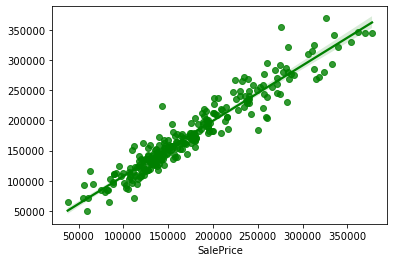

In [132]:
# Visualizing the predicted values
sns.regplot(y_test,y_pred,color="g")
plt.show()

# saving model

In [133]:
import pickle

In [134]:
import pickle
filename='house_rent.pk1'
pickle.dump(gb,open(filename,'wb'))

In [135]:
predicted_price  = gb.predict(df_test)

In [136]:
# saving the price in dataframe
Price_predicted = pd.DataFrame(predicted_price)

In [137]:
Price_predicted

0
0    376491.454127
1    331125.055349
2    338829.694523
3    356315.289849
4    370247.539236
5    311067.015662
6    337629.667121
7    367394.171427
8    360115.930577
9    345000.492932
10   361050.841262
11   320212.562966
12   341108.924621
13   325202.431272
14   336771.122846
15   332585.802623
16   372477.225365
17   354458.519728
18   328807.877802
19   330076.228217
20   341349.616315
21   351111.045109
22   347010.912968
23   337451.448890
24   356603.808685
25   317167.776743
26   351972.542823
27   349371.026764
28   361886.575162
29   338892.741403
30   358508.054649
31   359179.078245
32   315532.724201
33   369403.188349
34   339403.198881
35   345587.159971
36   382135.344126
37   364691.933862
38   343454.745133
39   338499.446516
40   338550.237688
41   336007.332129
42   327688.115954
43   361115.952003
44   381035.491194
45   362825.767900
46   378404.715230
47   324726.607998
48   325444.726096
49   350181.402425
50   345606.638671
51   352133.701239
52   333028.424687
53   318591.270835
54   326082.323202
55   355199.458634
56   329509.463910
57   357627.286798
58   353200.618742
59   321641.257964
60   342133.023456
61   358041.693169
62   338052.251867
63   331306.786118
64   380552.586478
65   300588.367374
66   362120.062511
67   360656.049777
68   328516.802512
69   379239.088126
70   398746.356147
71   339271.073299
72   370352.635158
73   342523.852658
74   359313.846198
75   363055.849024
76   337803.836756
77   364600.874609
78   407335.397384
79   330294.761042
80   346625.610292
81   339736.530644
82   308922.198208
83   346265.709152
84   327133.034566
85   335707.460257
86   372094.161192
87   344167.660114
88   352348.510282
89   363412.942418
90   388180.282486
91   328273.571626
92   357940.151924
93   338882.010246
94   329743.682608
95   368152.223048
96   375349.571066
97   364002.023238
98   371830.214314
99   300876.585287
100  361199.792174
101  366537.350680
102  357763.540424
103  361084.593155
104  375800.477896
105  349205.216656
106  345277.036277
107  304031.686551
108  358242.860655
109  356652.067021
110  335006.997909
111  318965.395952
112  348510.192620
113  394717.213472
114  335049.762911
115  357894.284584
116  359269.717198
117  334835.590038
118  341348.919513
119  343308.984397
120  379987.878442
121  341259.821422
122  345179.042050
123  365938.832090
124  375556.746169
125  354954.533847
126  332820.382196
127  364228.307510
128  331766.594847
129  341101.905554
130  345652.450843
131  389987.814956
132  367343.611707
133  350402.033975
134  367100.263614
135  338284.917907
136  351736.040005
137  333867.996806
138  339150.299354
139  363335.371838
140  347271.080939
141  322624.614315
142  363280.405879
143  344166.191891
144  347705.727659
145  320604.941265
146  333946.026976
147  341944.381581
148  357417.837654
149  327005.890244
150  283807.846344
151  375424.332006
152  380551.191469
153  364536.298461
154  332814.088376
155  342432.739282
156  371195.541398
157  367259.551037
158  352985.038914
159  361304.253408
160  329941.790277
161  333358.653900
162  317911.342663
163  358656.278860
164  360594.194236
165  349545.271014
166  358348.877946
167  316548.649102
168  332375.708034
169  386424.451000
170  387594.815012
171  313143.919871
172  351001.409884
173  359615.914667
174  301749.535889
175  312799.110587
176  319850.789889
177  334868.911394
178  326635.965544
179  317441.248129
180  359560.654364
181  356946.696510
182  338830.444518
183  385115.350111
184  349542.919029
185  312626.069650
186  336034.526288
187  343623.725702
188  333454.314586
189  378854.382278
190  334088.019232
191  320347.881210
192  325797.576312
193  330461.395003
194  357032.734989
195  324306.449517
196  311083.888744
197  359296.844996
198  348569.472029
199  314892.522113
200  323193.702490
201  350982.201465
202  361041.854393
203  341524.734259
204  313540.548255
205  328088.949060
206  364659.838843
207  385286.046803
208  320730.843290
209  309711.808234
210  384